In [ ]:
import sys
sys.path.append("utils")
import dynamic_backtesting as db
import compare_strategies as cs
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.style.use('seaborn')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["grey", "green", "black", "deepskyblue", "orange", "lime", "purple", "Gold", "brown", "blue", "pink"]) 

In [ ]:
assets = {"EEM": "Emerging Markets",
           "IVV": "S&P 500",
           "IEV": "MSCI Europe",
           "IXN": "Global Tech",
           "IYR": "US Real Estate",
           "IXG": "Global Financials",
           "EXI": "Global Industrials",
           "GC=F": "Gold Futures", 
           "BZ=F": "Brent Crude Oil Futures",
           "HYG": "High-Yield Corporate Bonds",
           "TLT": "20+ Year Treasury Bonds"}
tickers = list(assets.keys())
stocks = tickers[:7]
commodities = tickers[7:9]
bonds = tickers[9:]

**Laver funktion til at hente vægte og udregne performance for forskellige tickers og gamma**

In [ ]:
def backtesting(tickers,Gamma):
    v_t_ARCH_TC, out_of_sample_ARCH_TC, _,Omega_t_ARCH_TC = db.garch_with_trading_cost(tickers=tickers,
    number_of_out_of_sample_days=4*250, model_type="sGARCH10",tuning_gamma_D=Gamma)
    v_t_GARCH_TC, out_of_sample_GARCH_TC, _,Omega_t_GARCH_TC = db.garch_with_trading_cost(tickers=tickers,
    number_of_out_of_sample_days=4*250, model_type="sGARCH11",tuning_gamma_D=Gamma)
    v_t_GJR_TC, out_of_sample_GJR_TC, _,Omega_t_GJR_TC = db.garch_with_trading_cost(tickers=tickers,
    number_of_out_of_sample_days=4*250, model_type="gjrGARCH11",tuning_gamma_D=Gamma)
    res_ARCH_TC, perf_table_ARCH_TC = cs.performance_table(v_t_ARCH_TC, out_of_sample_ARCH_TC,Omega_t_ARCH_TC,portfolio_value=1e9)
    res_GARCH_TC, perf_table_GARCH_TC = cs.performance_table(v_t_GARCH_TC, out_of_sample_GARCH_TC,Omega_t_GARCH_TC,portfolio_value=1e9)
    res_GJR_TC, perf_table_GJR_TC = cs.performance_table(v_t_GJR_TC, out_of_sample_GJR_TC,Omega_t_GJR_TC,portfolio_value=1e9)
    perf_table_TC=perf_table_ARCH_TC.iloc[0:1,]
    perf_table_TC=perf_table_TC.rename(index={'GARCH':'ARCH(1)'})
    perf_table_TC=perf_table_TC.append(perf_table_GARCH_TC.iloc[0,])
    perf_table_TC=perf_table_TC.rename(index={'GARCH':'GARCH(1,1)'})
    perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[0,])
    perf_table_TC=perf_table_TC.rename(index={'GARCH':'GJR-GARCH(1,1)'})
    perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[2,])
    perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[1,])
    perf_table_TC=perf_table_TC.rename(index={'BnH':'Buy and hold','Equal_weight':'Equal weight'})
    #Trading cost
    perf_table_TC=perf_table_TC.append(perf_table_ARCH_TC.iloc[3,])
    perf_table_TC=perf_table_TC.rename(index={'GARCH TC':'ARCH(1) TC'})
    perf_table_TC=perf_table_TC.append(perf_table_GARCH_TC.iloc[3,])
    perf_table_TC=perf_table_TC.rename(index={'GARCH TC':'GARCH(1,1) TC'})
    perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[3,])
    perf_table_TC=perf_table_TC.rename(index={'GARCH TC':'GJR-GARCH(1,1) TC'})
    perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[4,])
    perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[5,])
    perf_table_TC=perf_table_TC.rename(index={'BnH TC':'Buy and hold TC','Equal_weight TC':'Equal weight TC'})

    #gross and net return
    res_tc=res_ARCH_TC.drop(columns=['GARCH TC','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH':'ARCH(1)'})
    res_tc["GARCH(1,1)"]=res_GARCH_TC["GARCH"]
    res_tc["GJR-GARCH(1,1)"]=res_GJR_TC["GARCH"]
    res_tc["Equal weight"]=res_GJR_TC["Equal_weight"]
    res_tc["Buy and hold"]=res_GJR_TC["BnH"]

    res_tc_TC=res_ARCH_TC.drop(columns=['GARCH','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH TC':'ARCH(1)'})
    res_tc_TC["GARCH(1,1)"]=res_GARCH_TC["GARCH TC"]
    res_tc_TC["GJR-GARCH(1,1)"]=res_GJR_TC["GARCH TC"]
    res_tc_TC["Equal weight"]=res_GJR_TC["Equal_weight TC"]
    res_tc_TC["Buy and hold"]=res_GJR_TC["BnH TC"]
    return v_t_ARCH_TC,v_t_GARCH_TC, v_t_GJR_TC, perf_table_TC,res_tc,res_tc_TC


In [ ]:
gamma_low=1.526988705495546e-06
gamma_medium=1.3e-5
gamma_high=1e-4

**All assets, calibrated gamma**

In [ ]:
v_t_ARCH_all_low,v_t_GARCH_all_low, v_t_GJR_all_low, perf_table_all_low,res_all_low,res_all_low_TC = backtesting(tickers,gamma_low)

**Figurer**

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_all_low,label=res_all_low.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_all_low.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
fig.savefig("Performance_TC_before_L.png", bbox_inches = 'tight', pad_inches = 0.1)

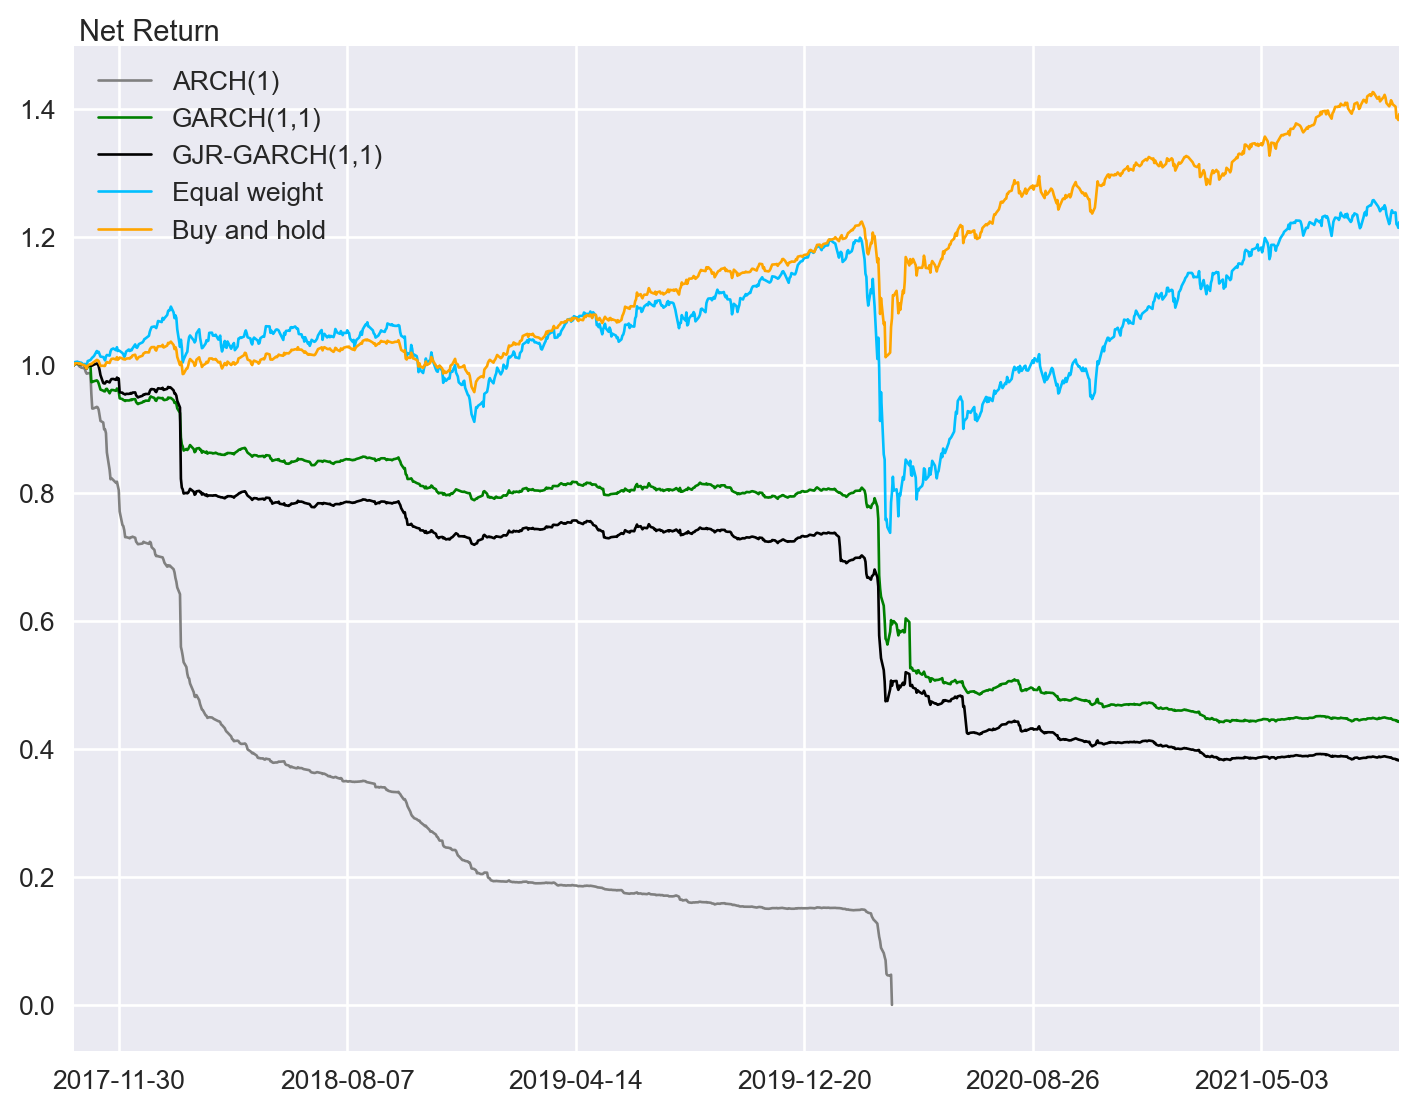

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_all_low_TC,label=res_all_low_TC.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_all_low_TC.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Net Return',loc='top', rotation = 0, labelpad = -76) 
fig.savefig("Performance_TC_after_L.png", bbox_inches = 'tight', pad_inches = 0.1)

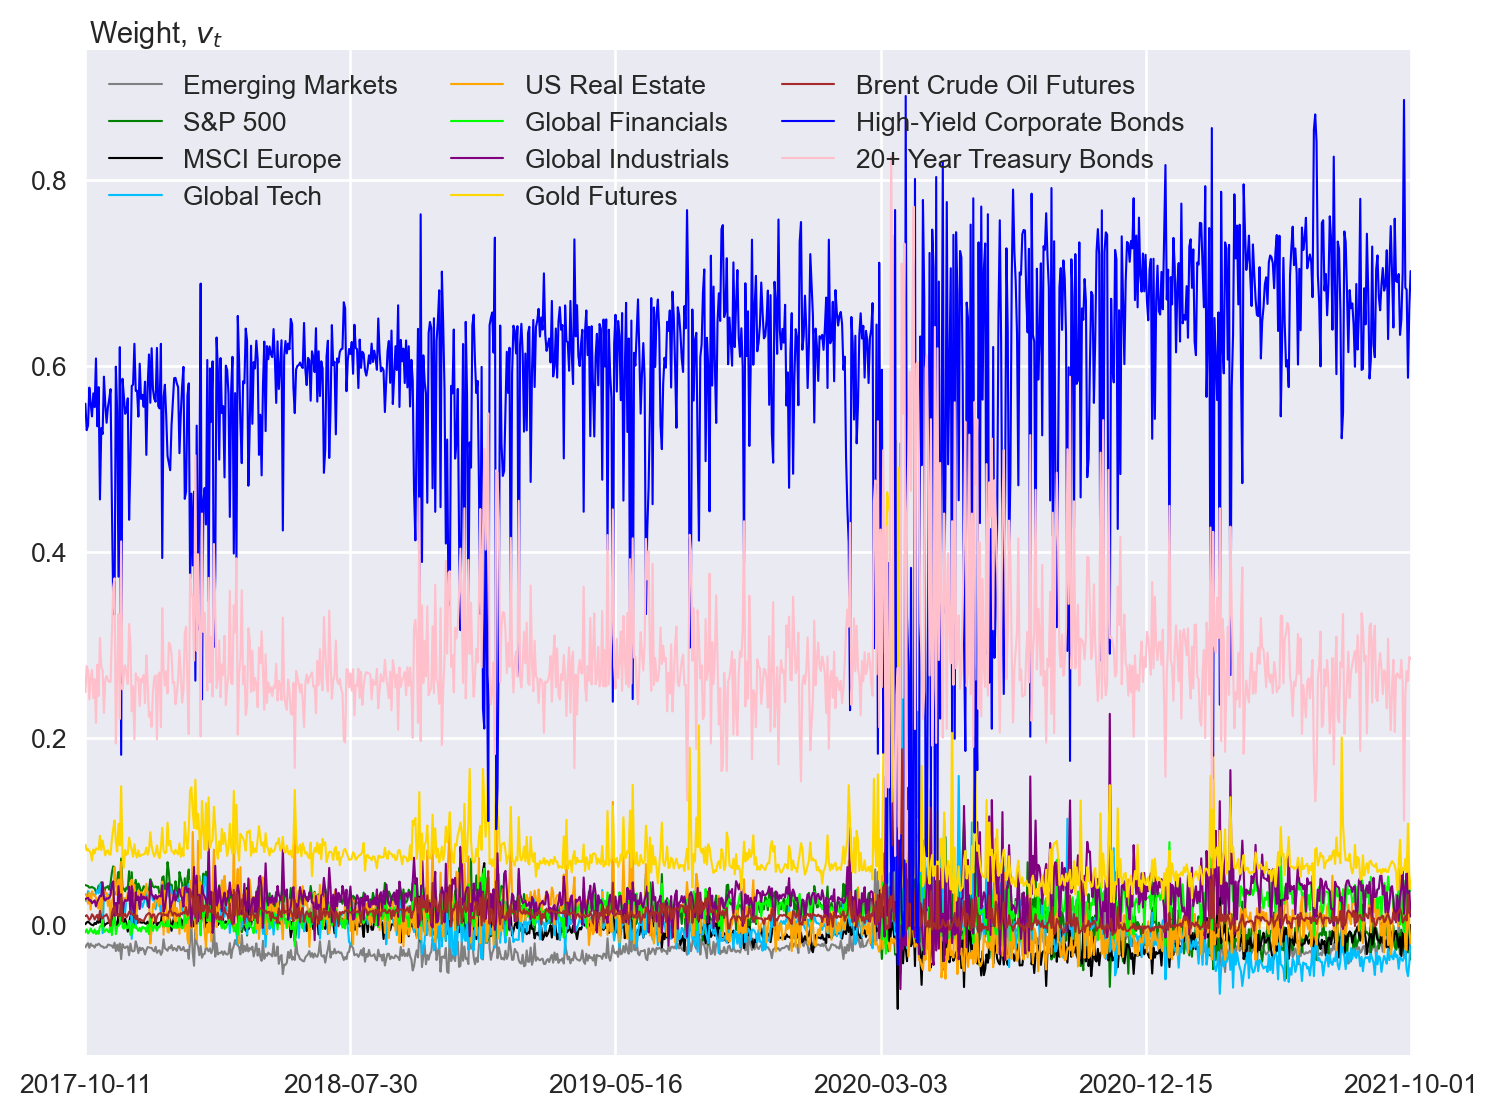

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH_all_low,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("ARCH_weight_TC_L.png", bbox_inches = 'tight', pad_inches = 0.1)

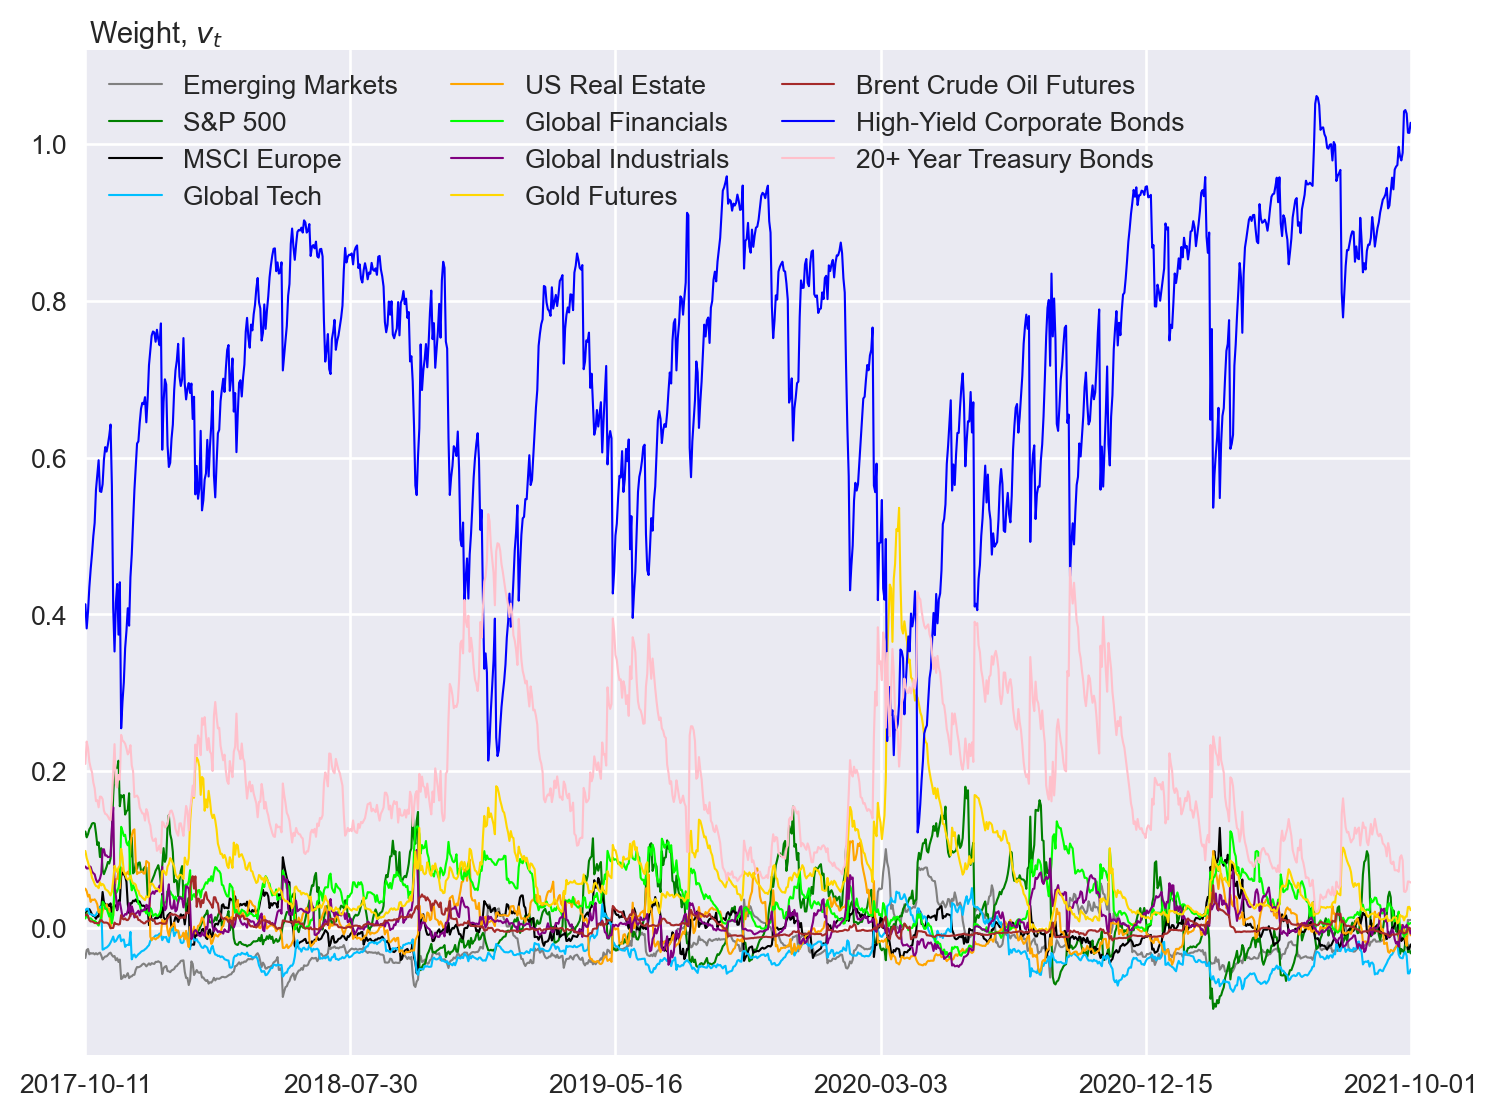

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH_all_low,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("GARCH_weight_TC_L.png", bbox_inches = 'tight', pad_inches = 0.1)

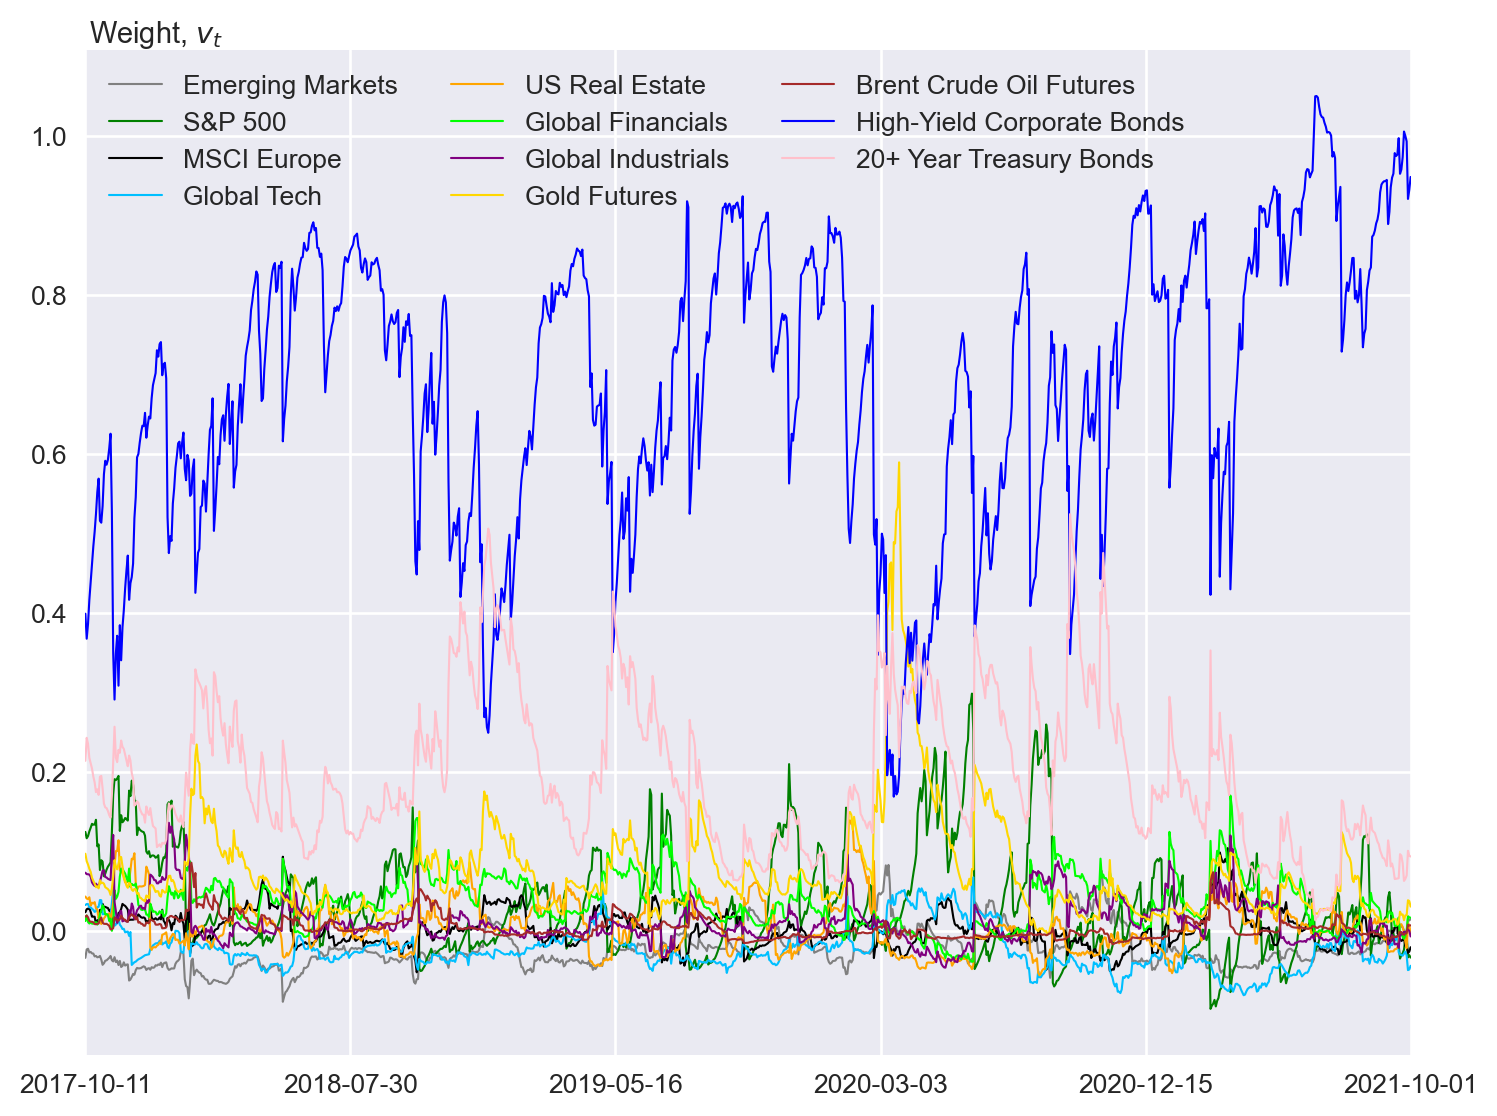

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR_all_low,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("GJRGARCH_weight_TC_L.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
print(perf_table_all_low.round(4).to_latex())

**All assets, lowest std**

In [ ]:
v_t_ARCH_all_std,v_t_GARCH_all_std, v_t_GJR_all_std, perf_table_all_std,res_all_std,res_all_std_TC = backtesting(tickers,gamma_medium)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_all_std,label=res_all_std.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_all_std.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
fig.savefig("Performance_TC_before_M.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_all_std_TC,label=res_all_std_TC.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_all_std_TC.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Net Return',loc='top', rotation = 0, labelpad = -76) 
fig.savefig("Performance_TC_after_M.png", bbox_inches = 'tight', pad_inches = 0.1)

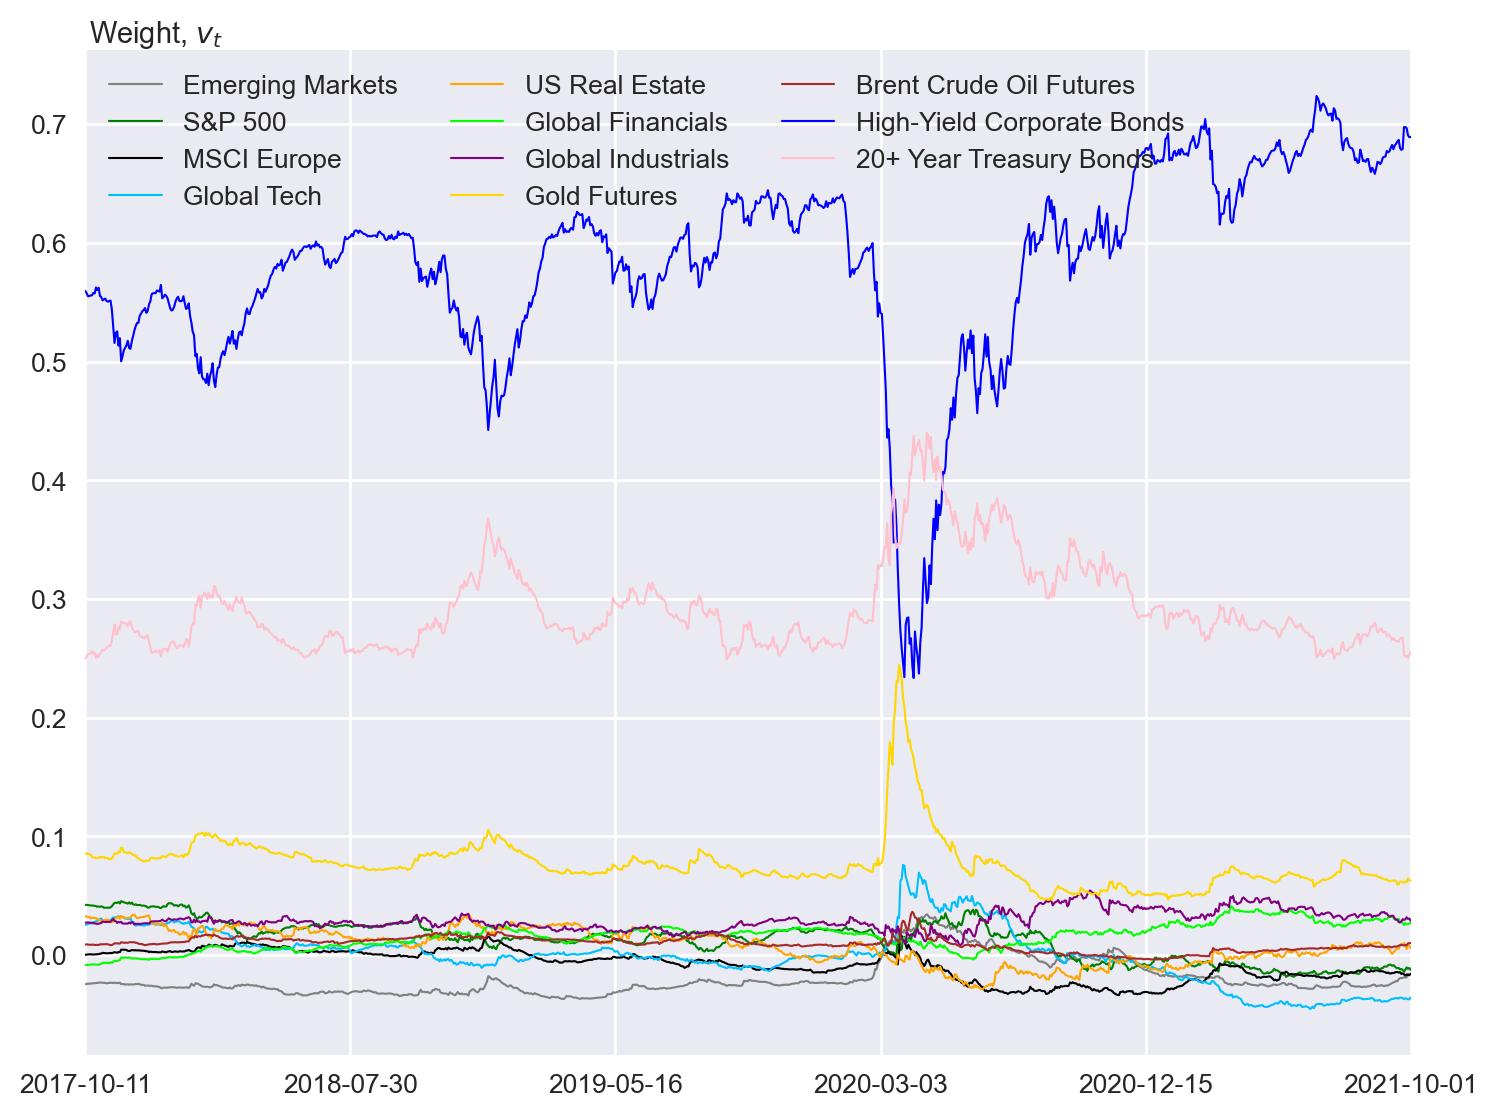

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH_all_std,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("ARCH_weight_TC_M.png", bbox_inches = 'tight', pad_inches = 0.1)

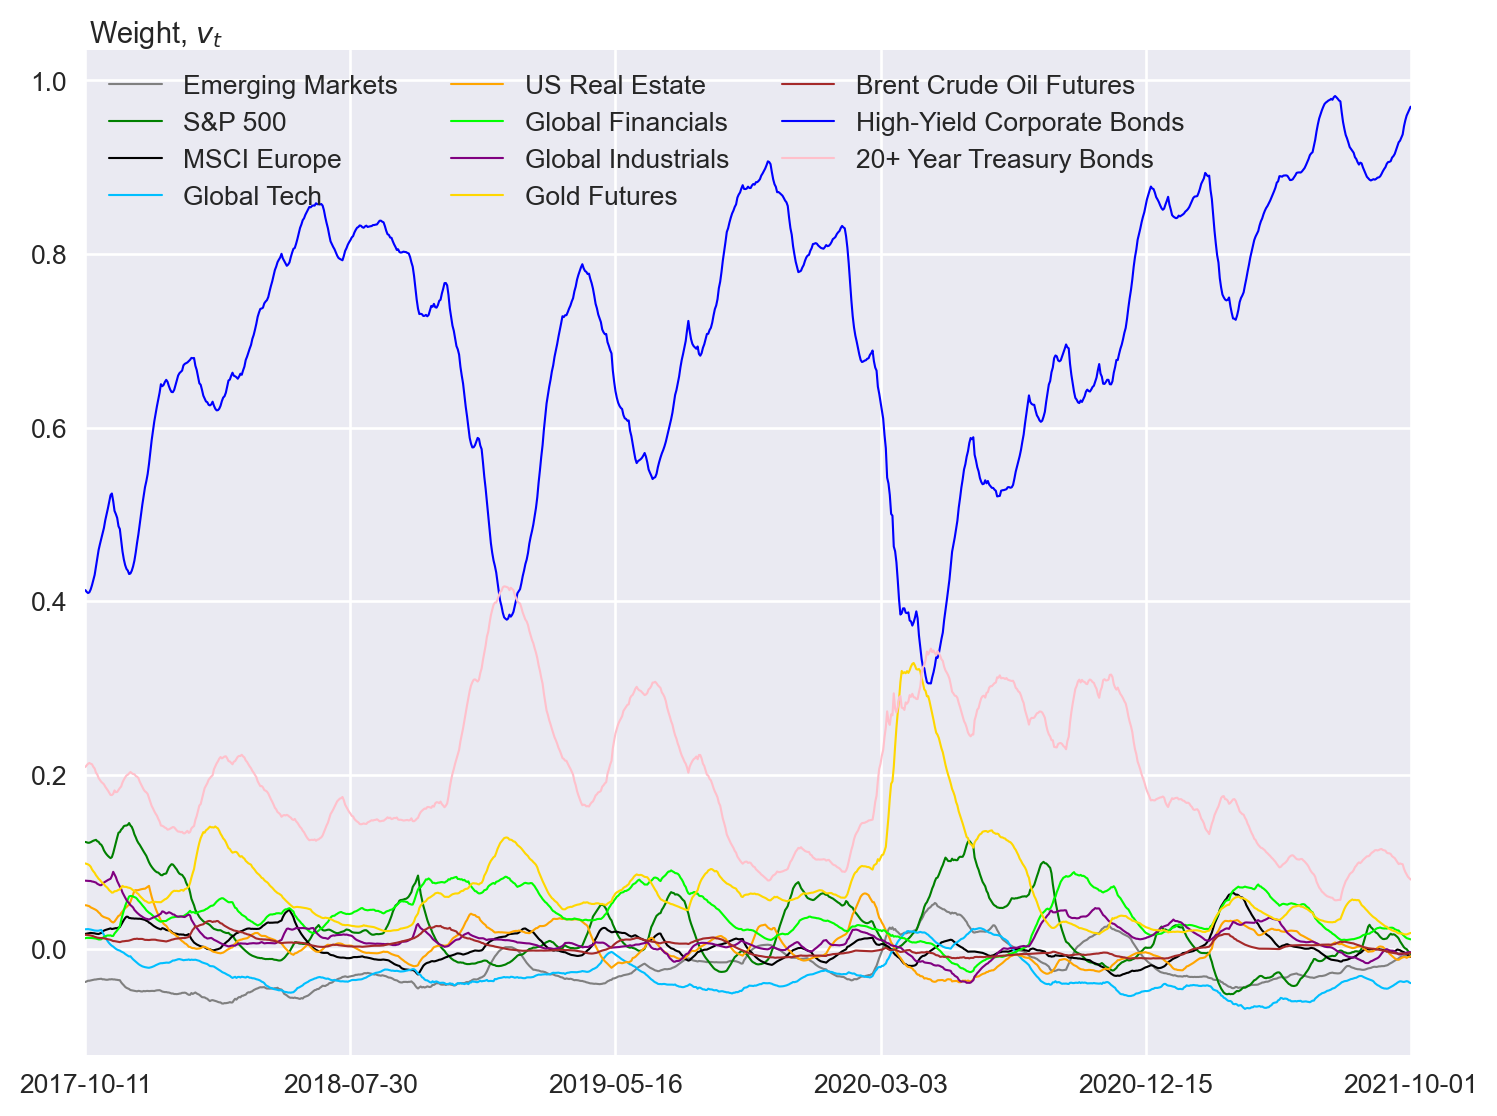

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH_all_std,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("GARCH_weight_TC_M.png", bbox_inches = 'tight', pad_inches = 0.1)

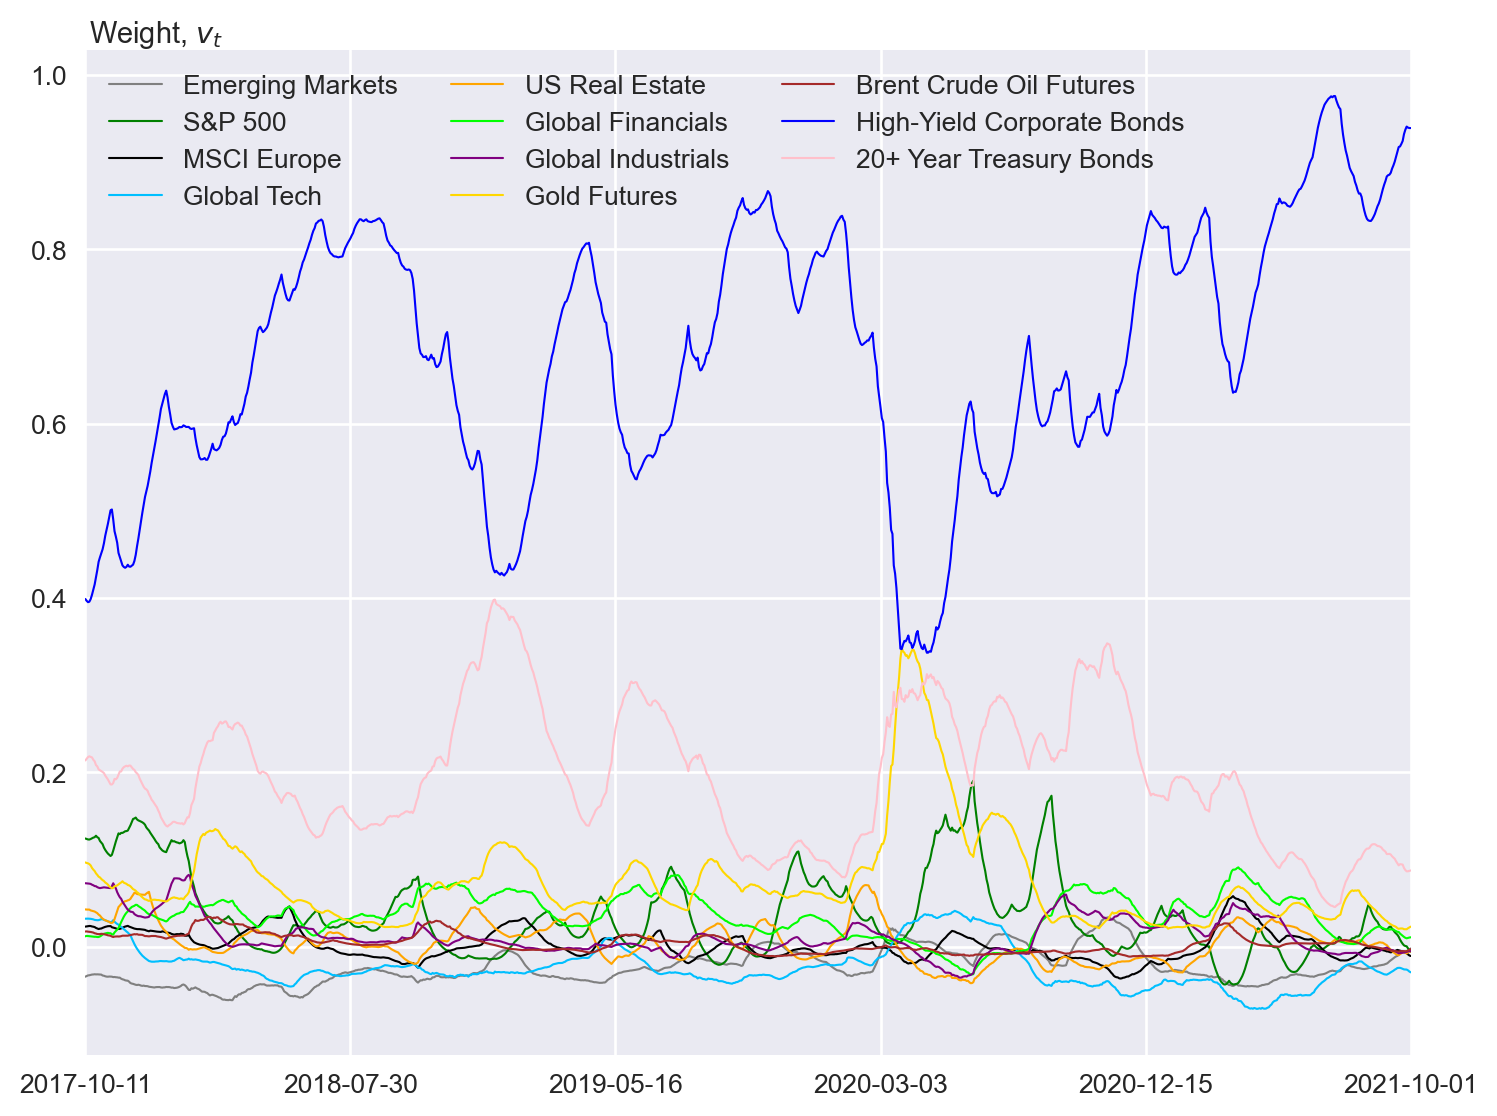

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR_all_std,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("GJRGARCH_weight_TC_M.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
print(perf_table_all_std.round(4).to_latex()) 

**All assets, combination between return and risk**

In [ ]:
v_t_ARCH_all_best,v_t_GARCH_all_best, v_t_GJR_all_best, perf_table_all_best,res_all_best,res_all_best_TC = backtesting(tickers,gamma_high)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_all_best,label=res_all_best.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_all_best.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
fig.savefig("Performance_TC_before_H.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_all_best_TC,label=res_all_best_TC.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_all_best_TC.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Net Return',loc='top', rotation = 0, labelpad = -76) 
fig.savefig("Performance_TC_after_H.png", bbox_inches = 'tight', pad_inches = 0.1)

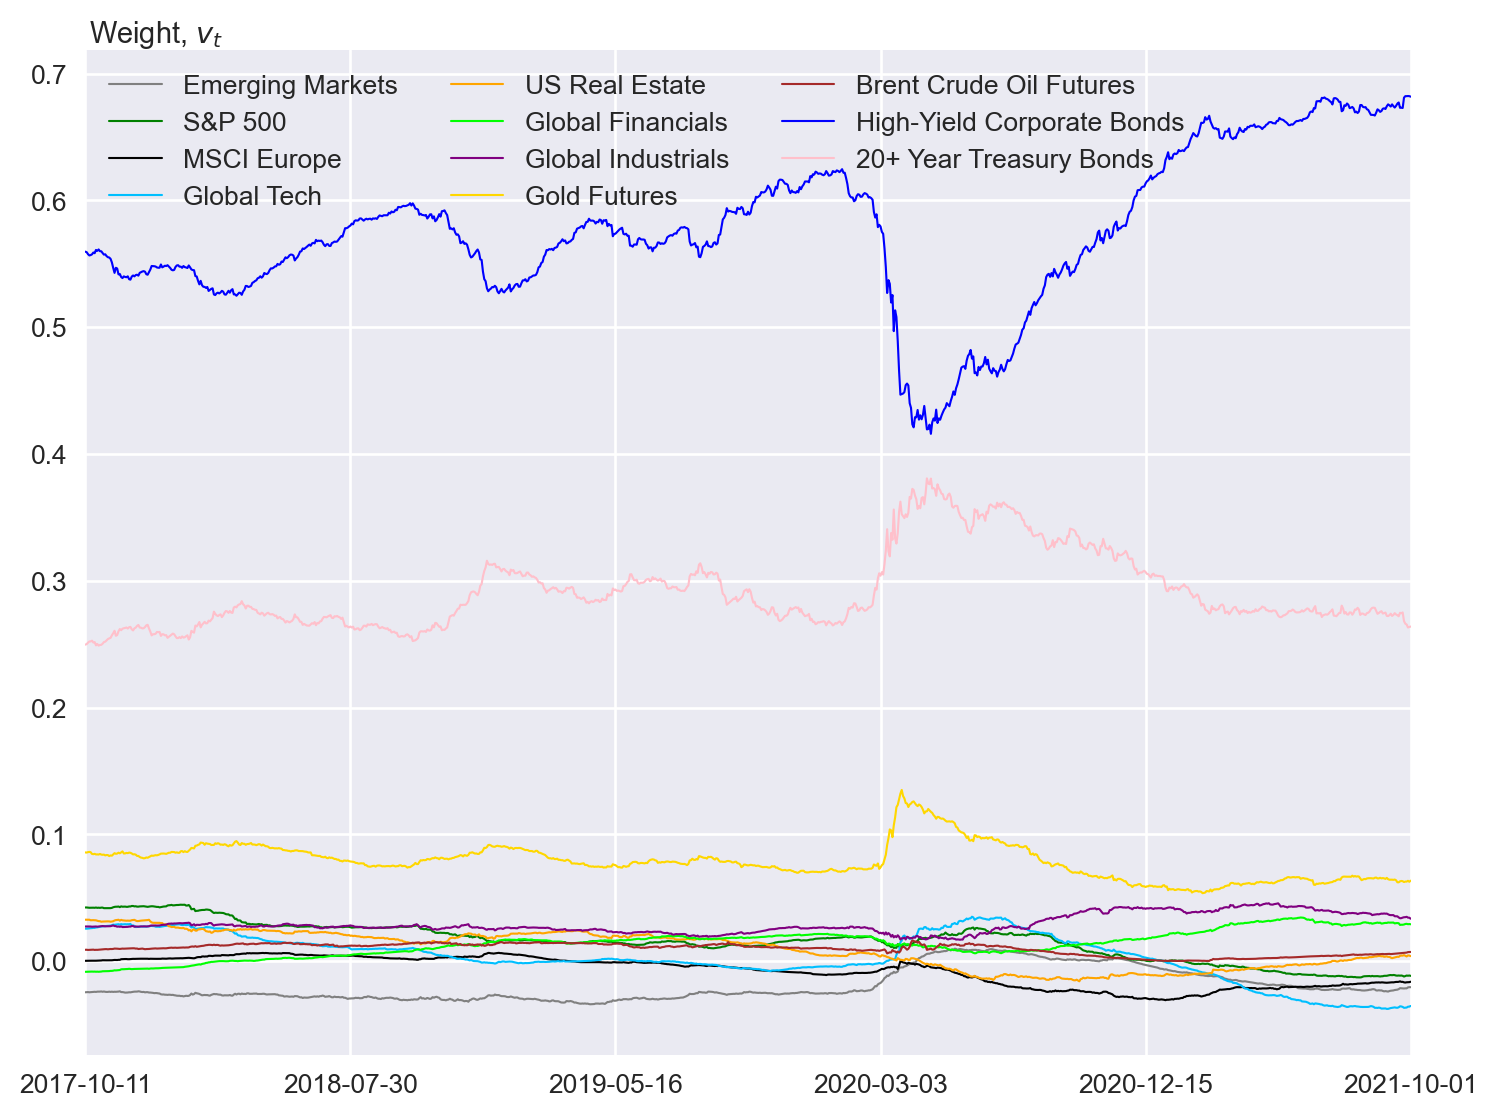

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH_all_best,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("ARCH_weight_TC_H.png", bbox_inches = 'tight', pad_inches = 0.1)

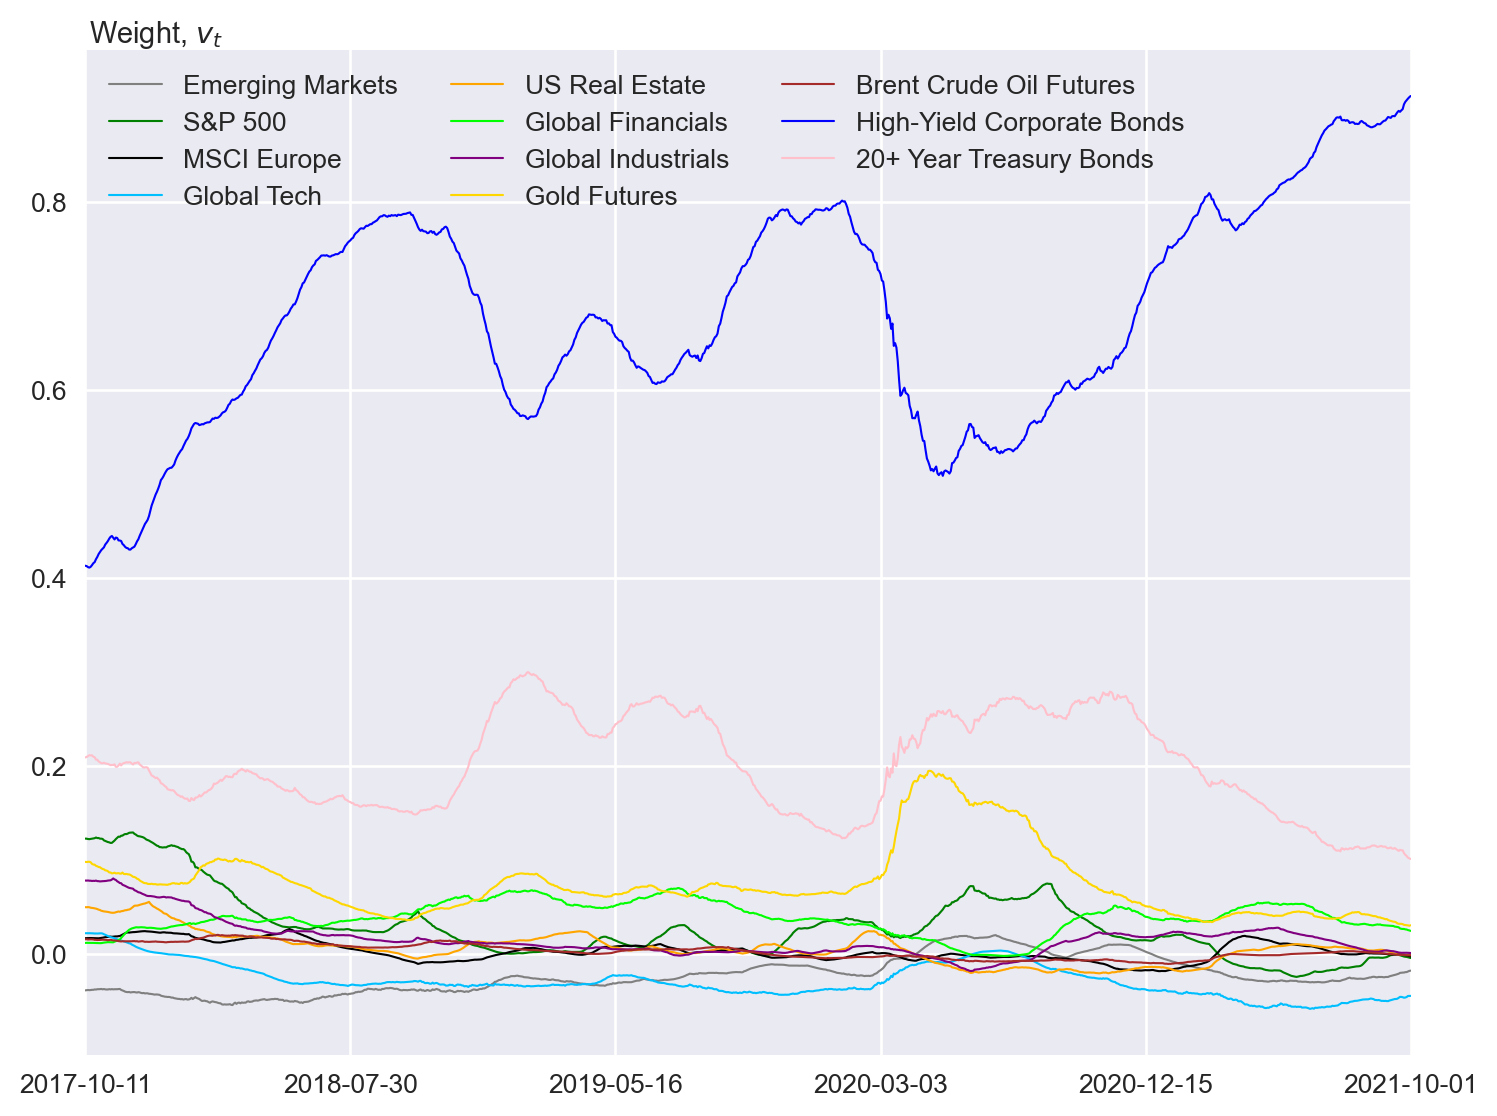

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH_all_best,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("GARCH_weight_TC_H.png", bbox_inches = 'tight', pad_inches = 0.1)

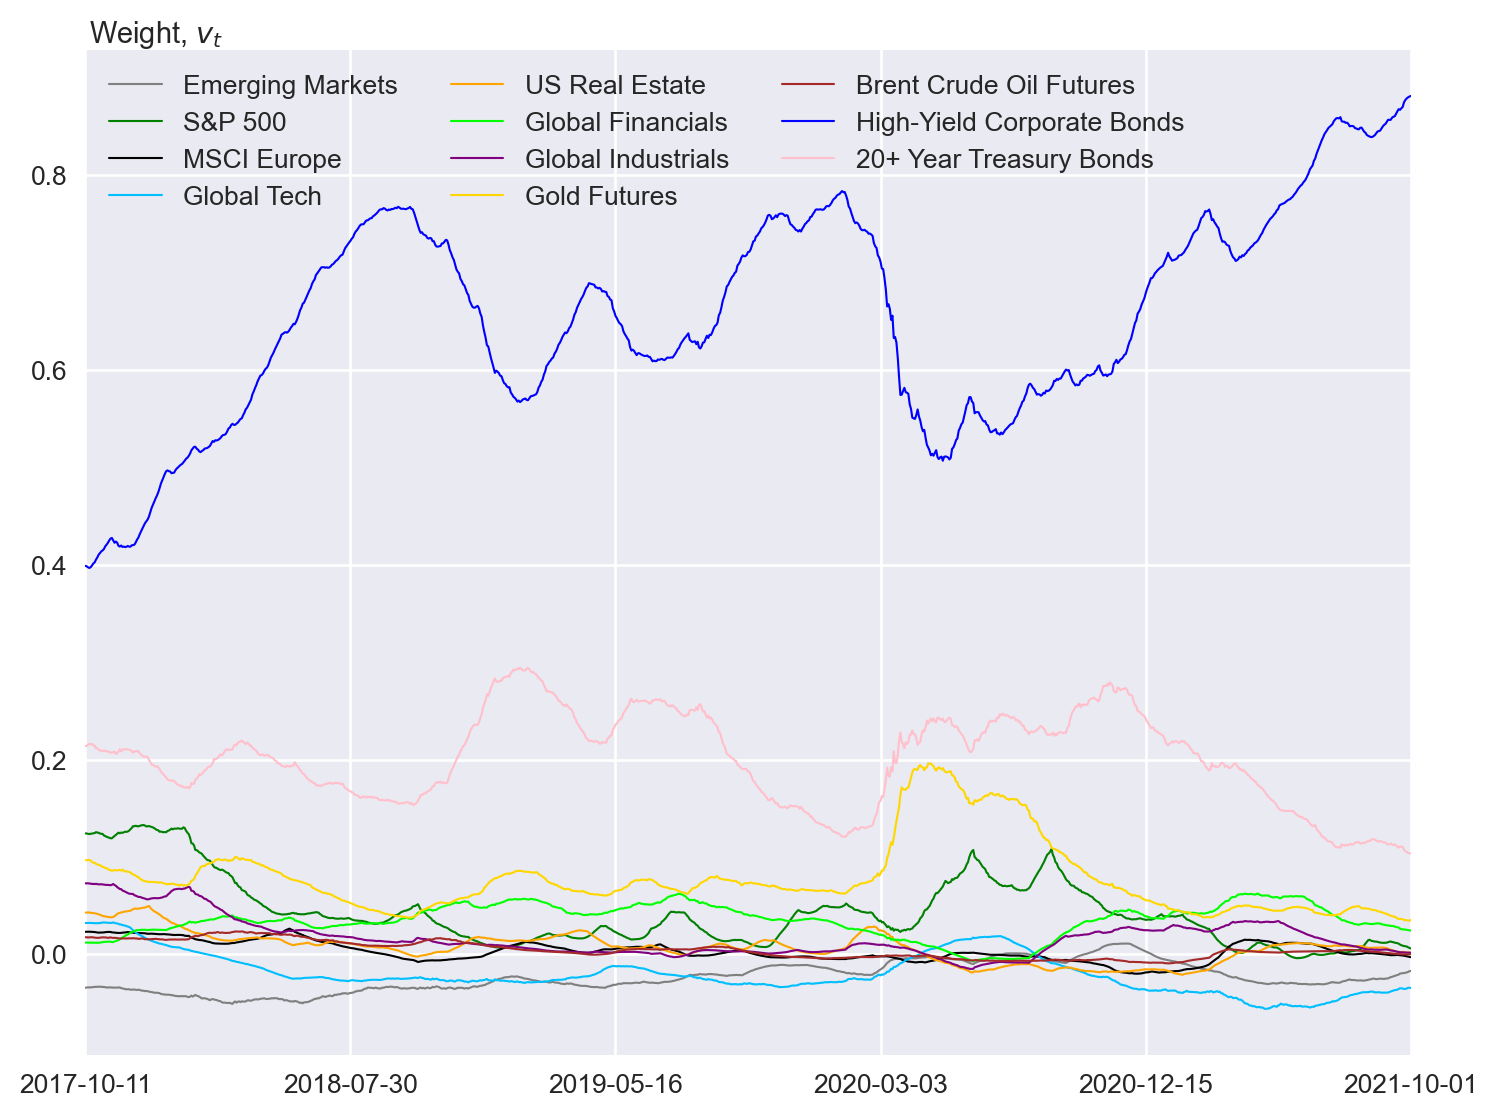

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR_all_best,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("GJRGARCH_weight_TC_H.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
print(perf_table_all_best.round(4).to_latex())  

**Commundities, calibrated gamma**

In [44]:
v_t_ARCH_com_low,v_t_GARCH_com_low, v_t_GJR_com_low, perf_table_com_low,res_com_low,res_com_low_TC = backtesting(commodities,gamma_low)

['GC=F', 'BZ=F']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 1.526988705495546e-06
['GC=F', 'BZ=F']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 1.526988705495546e-06
['GC=F', 'BZ=F']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 1.526988705495546e-06


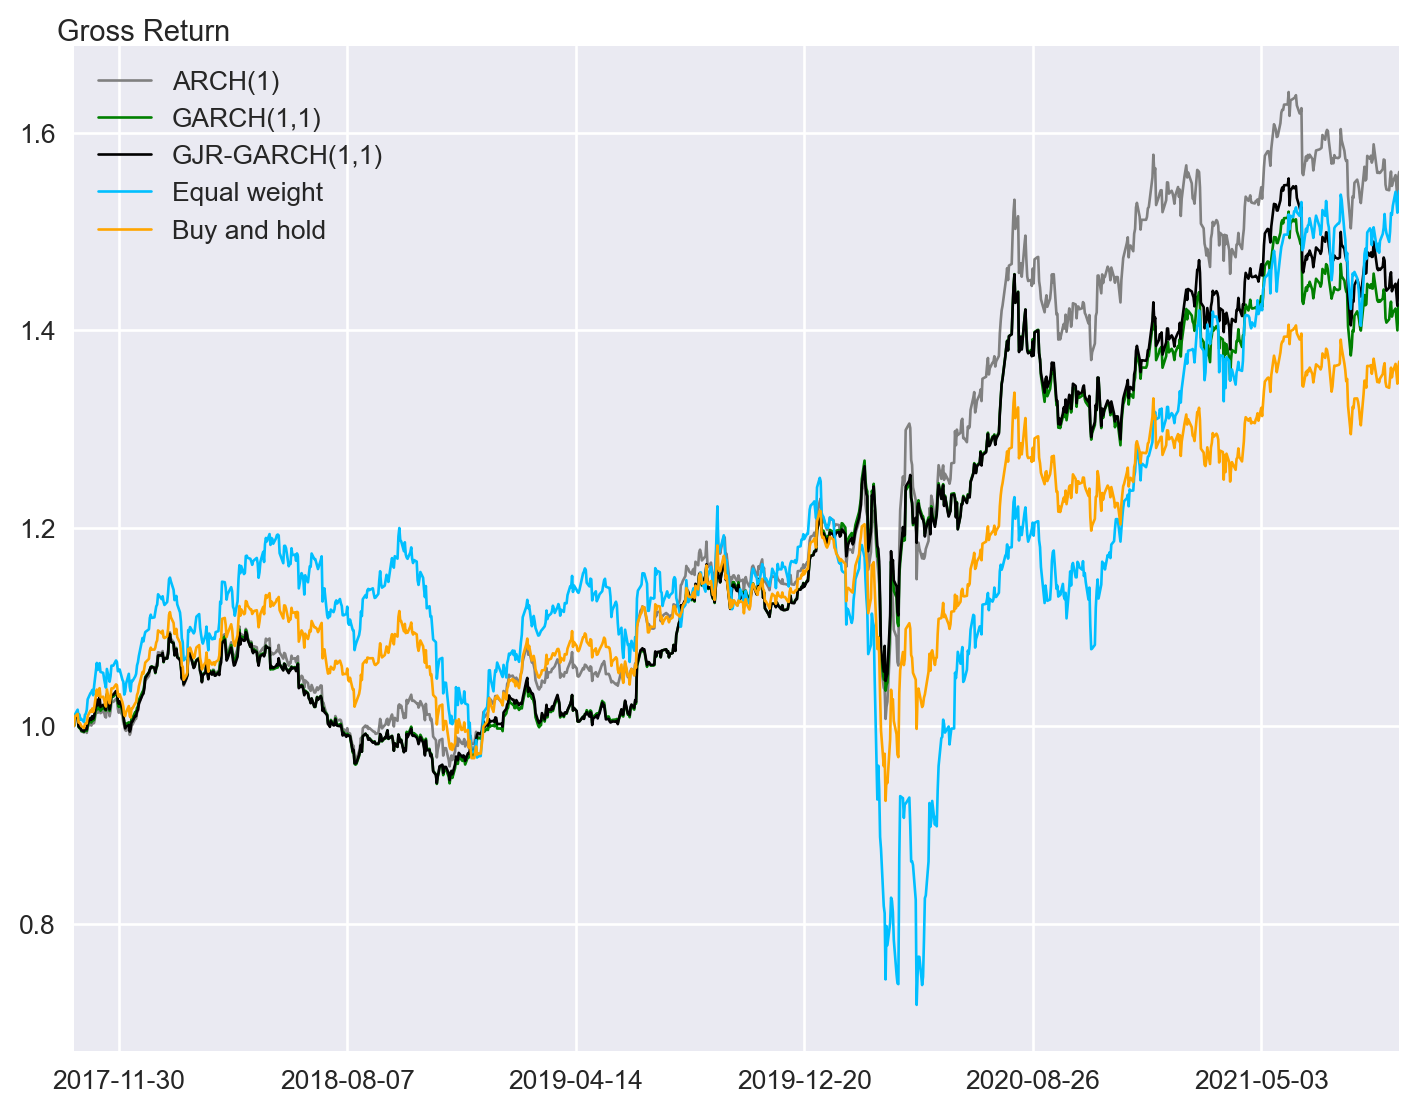

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_com_low,label=res_com_low.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_com_low.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -80) 
fig.savefig("Performance_TC_com_before_L.png", bbox_inches = 'tight', pad_inches = 0.1)

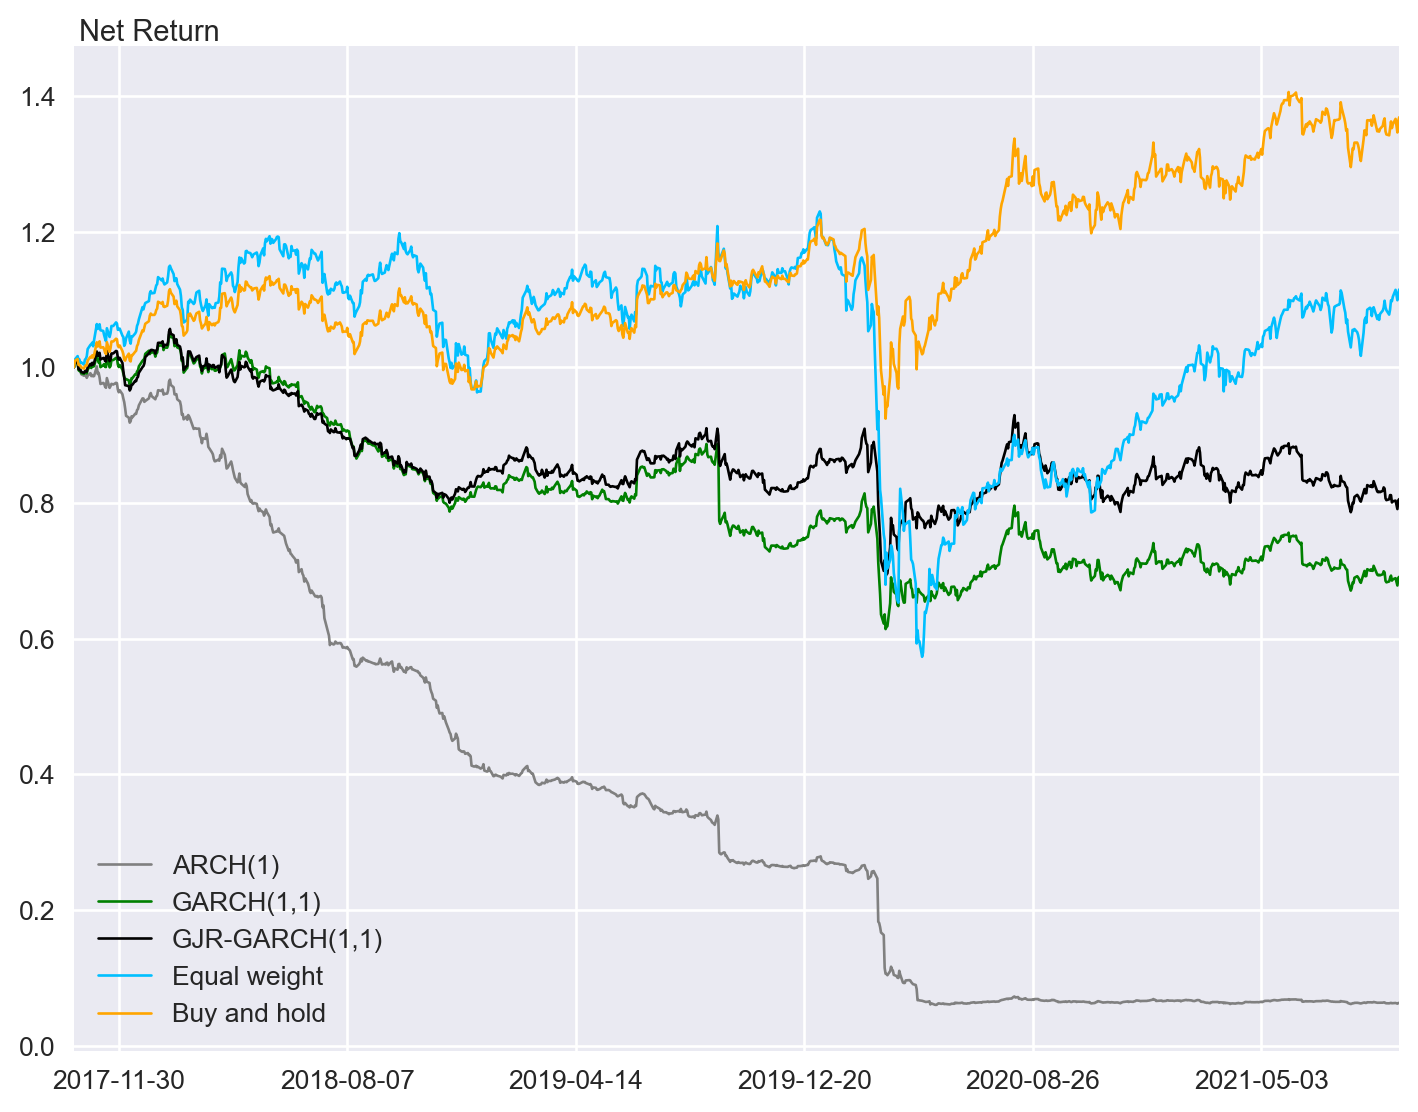

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_com_low_TC,label=res_com_low_TC.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_com_low_TC.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Net Return',loc='top', rotation = 0, labelpad = -76) 
fig.savefig("Performance_TC_com_after_L.png", bbox_inches = 'tight', pad_inches = 0.1)

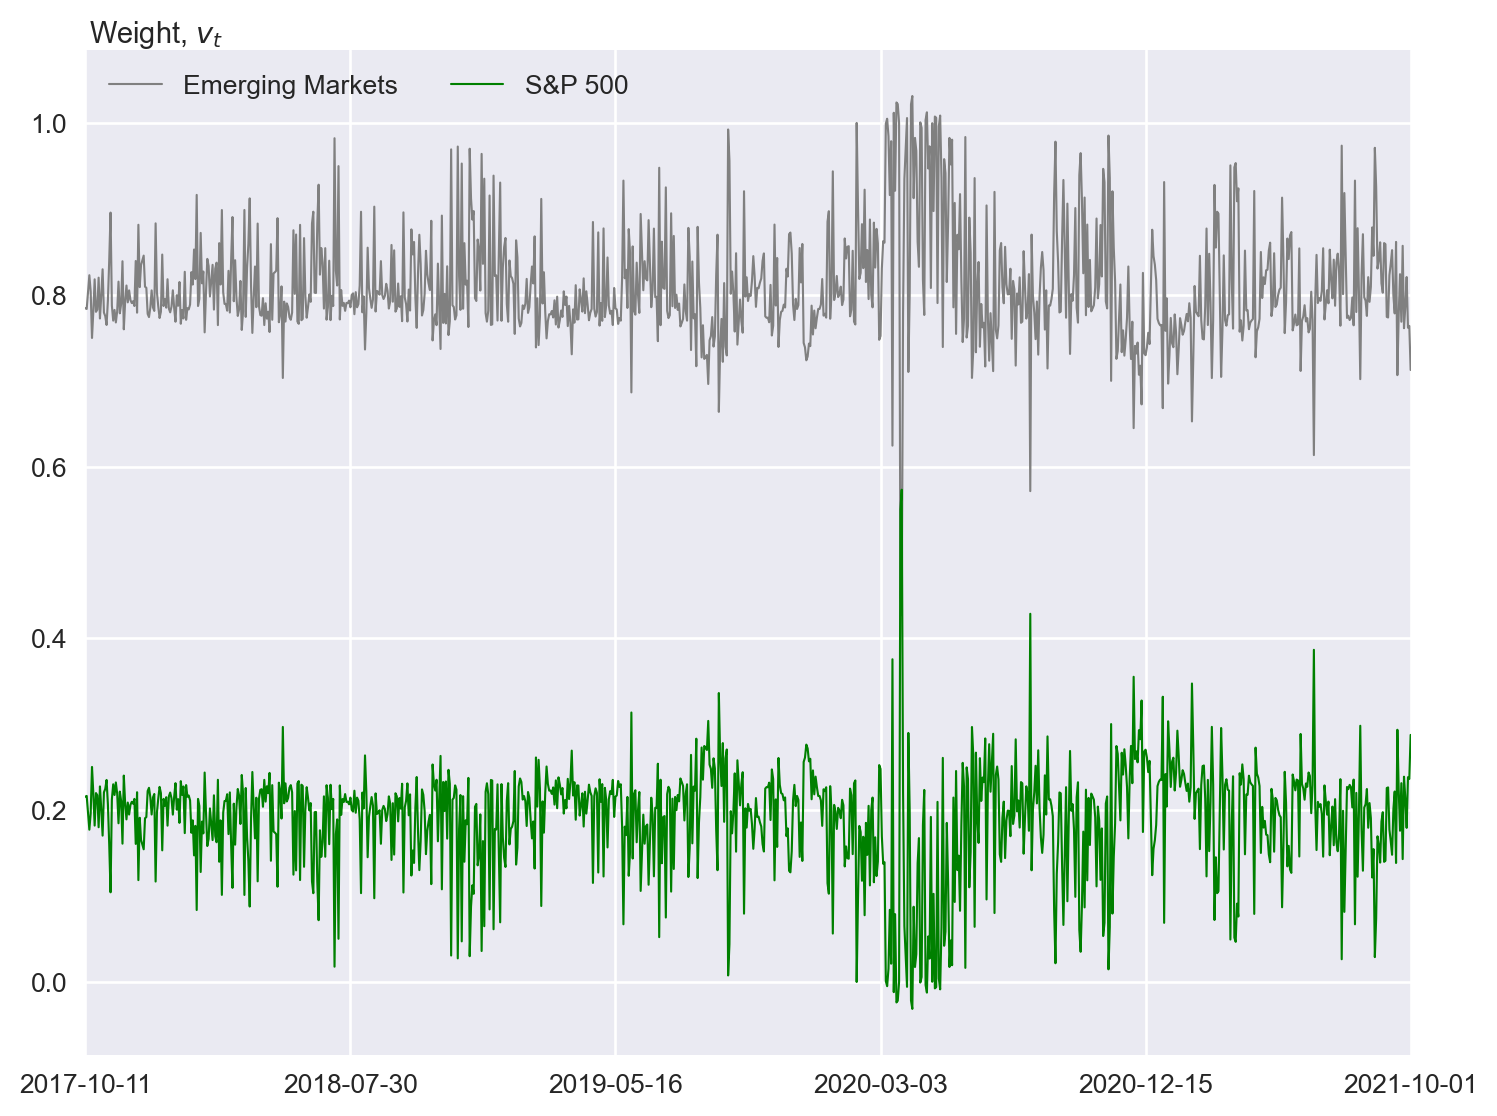

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH_com_low,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("ARCH_weight_TC_com_L.png", bbox_inches = 'tight', pad_inches = 0.1)

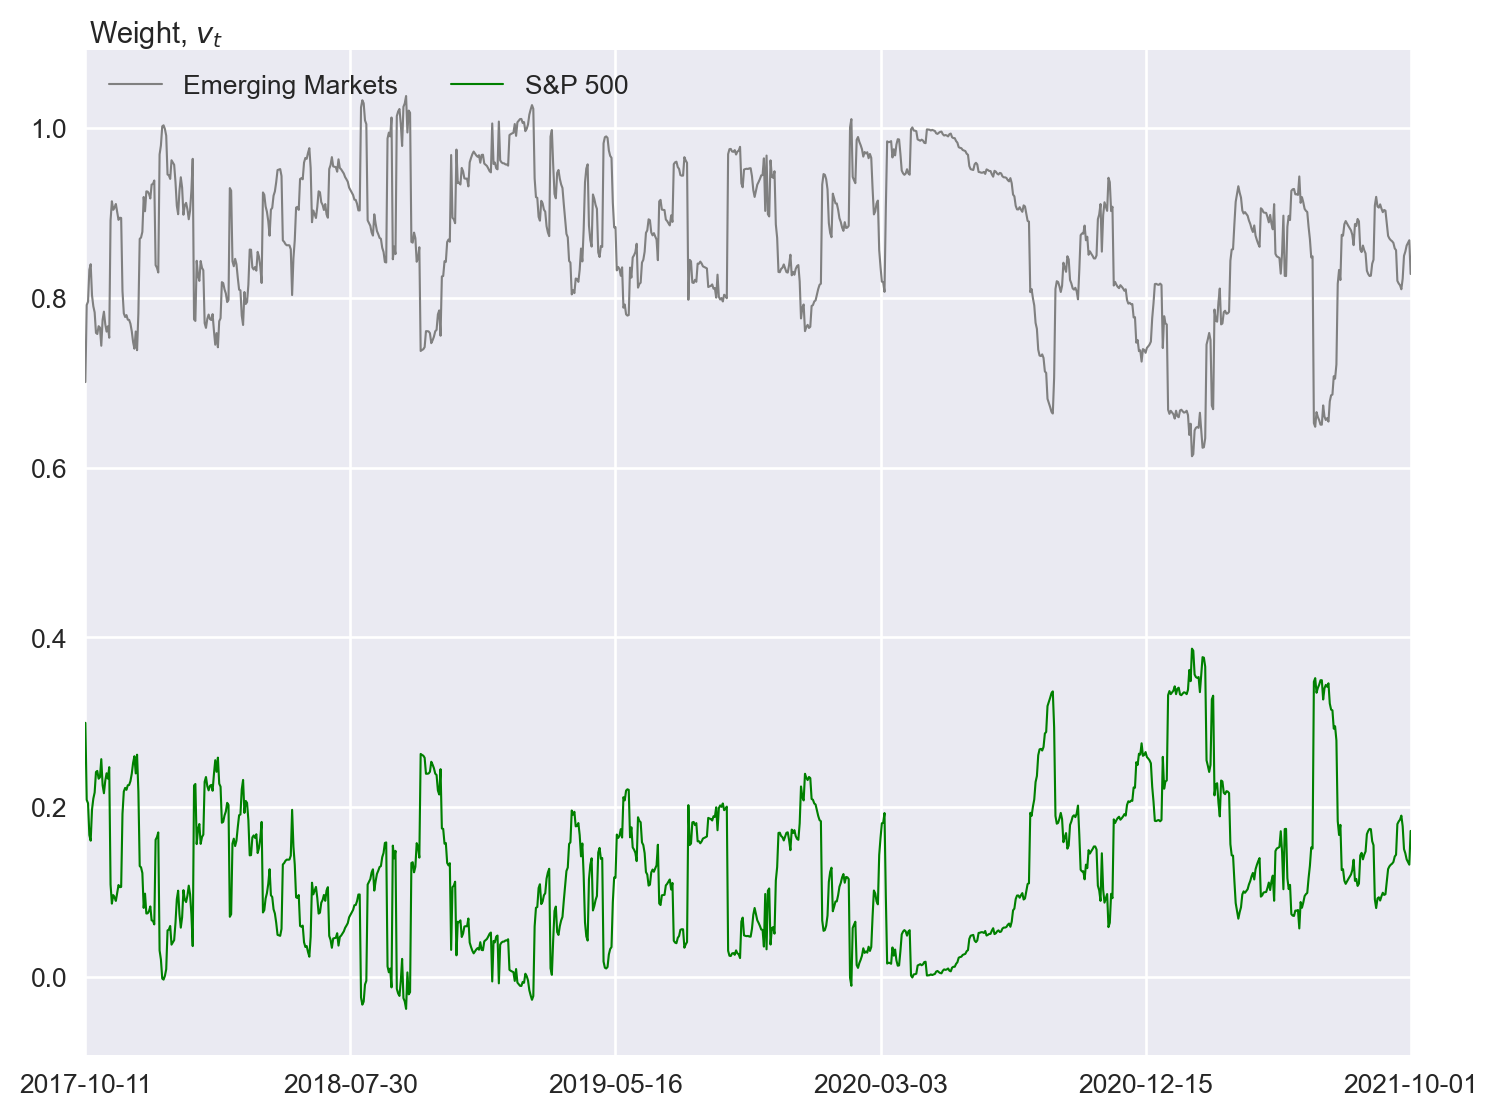

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH_com_low,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("GARCH_weight_TC_com_L.png", bbox_inches = 'tight', pad_inches = 0.1)

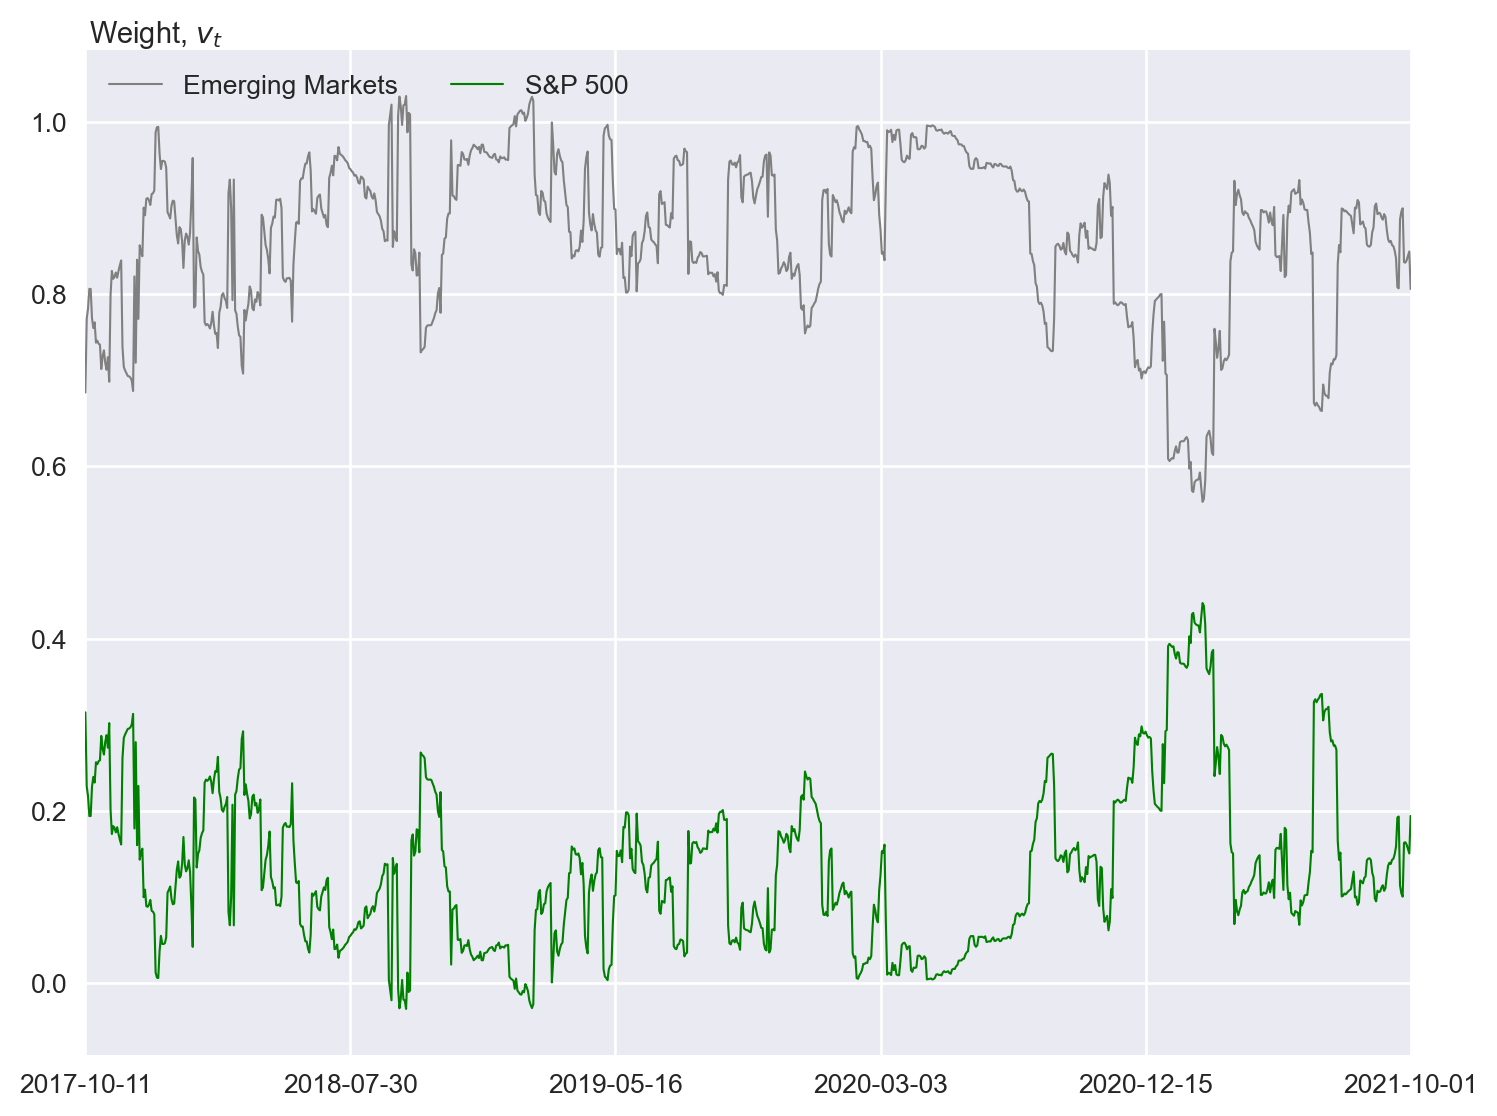

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR_com_low,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("GJRGARCH_weight_TC_com_L.png", bbox_inches = 'tight', pad_inches = 0.1)

In [50]:
print(perf_table_com_low.round(4).to_latex())  

\begin{tabular}{lrrr}
\toprule
{} &  Ann. standard deviation &  Ann. return &  Ann. Sharpe ratio \\
\midrule
ARCH(1)           &                   0.1590 &       0.1176 &             0.7398 \\
GARCH(1,1)        &                   0.1461 &       0.0929 &             0.6355 \\
GJR-GARCH(1,1)    &                   0.1446 &       0.0976 &             0.6747 \\
Buy and hold      &                   0.1584 &       0.0816 &             0.5151 \\
Equal weight      &                   0.2412 &       0.1141 &             0.4733 \\
ARCH(1) TC        &                   0.2951 &      -0.4988 &            -1.6905 \\
GARCH(1,1) TC     &                   0.1619 &      -0.0882 &            -0.5448 \\
GJR-GARCH(1,1) TC &                   0.1517 &      -0.0526 &            -0.3466 \\
Equal weight TC   &                   0.2446 &       0.0275 &             0.1125 \\
Buy and hold TC   &                   0.1584 &       0.0816 &             0.5151 \\
\bottomrule
\end{tabular}



**Commundities, medium gamma**

In [52]:
v_t_ARCH_com_LSTD,v_t_GARCH_com_LSTD, v_t_GJR_com_LSTD, perf_table_com_LSTD,res_com_LSTD,res_com_LSTD_TC = backtesting(commodities,gamma_medium)

['GC=F', 'BZ=F']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 2.3e-05
['GC=F', 'BZ=F']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 2.3e-05
['GC=F', 'BZ=F']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 2.3e-05


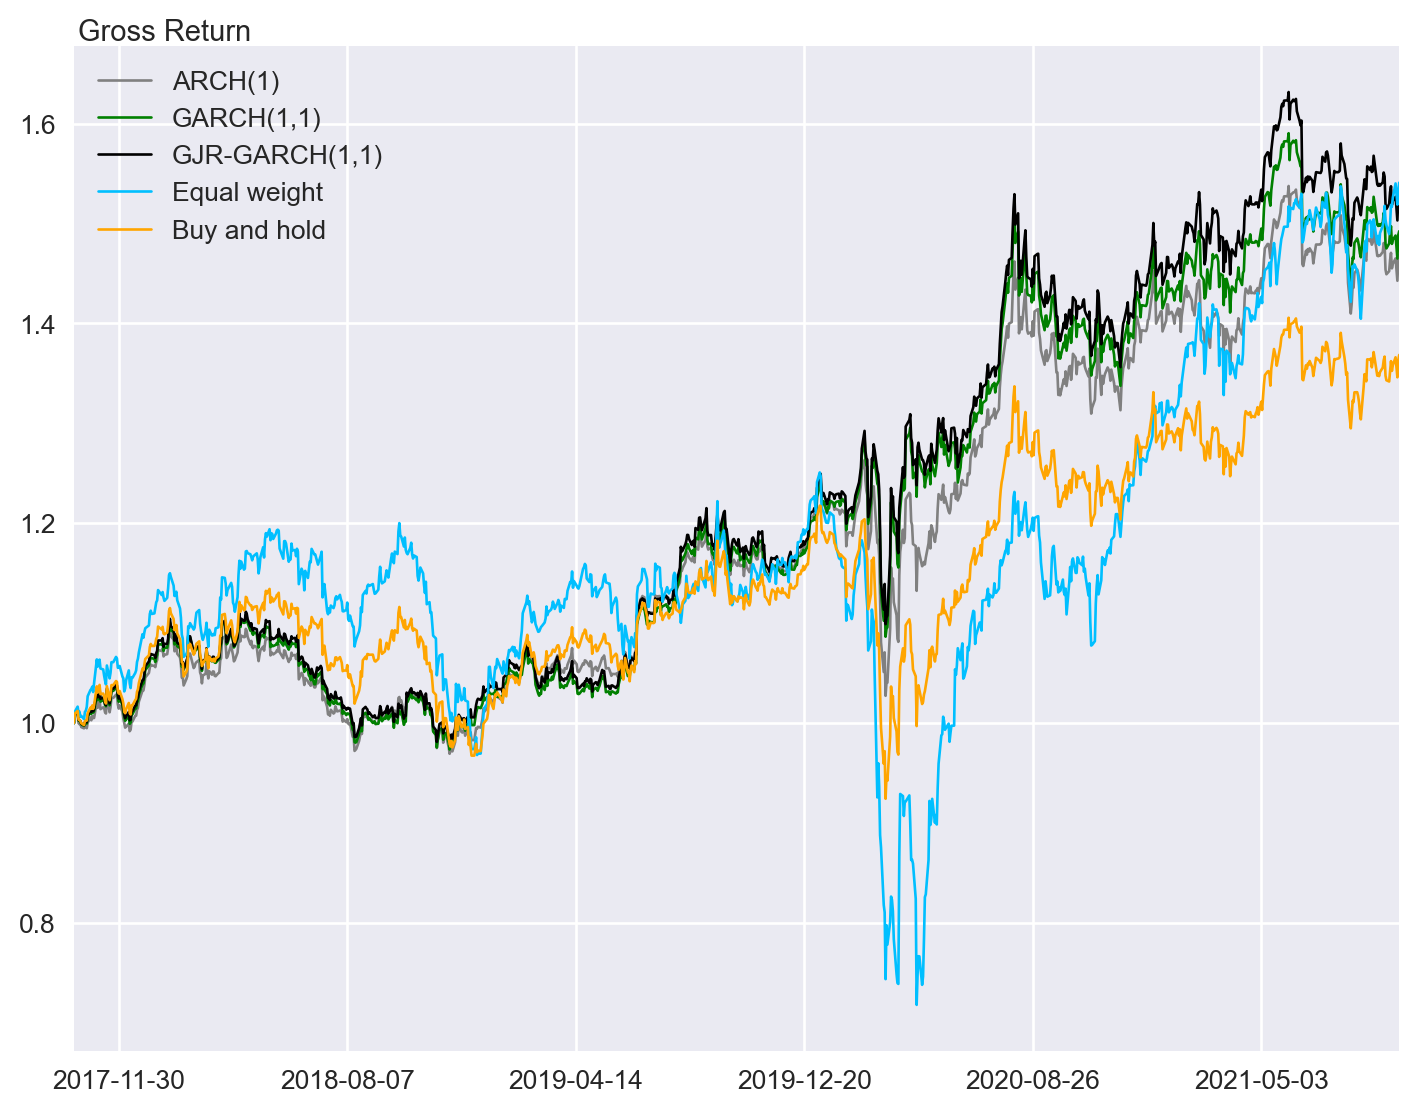

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_com_LSTD,label=res_com_LSTD.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_com_LSTD.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
fig.savefig("Performance_TC_com_before_M.png", bbox_inches = 'tight', pad_inches = 0.1)

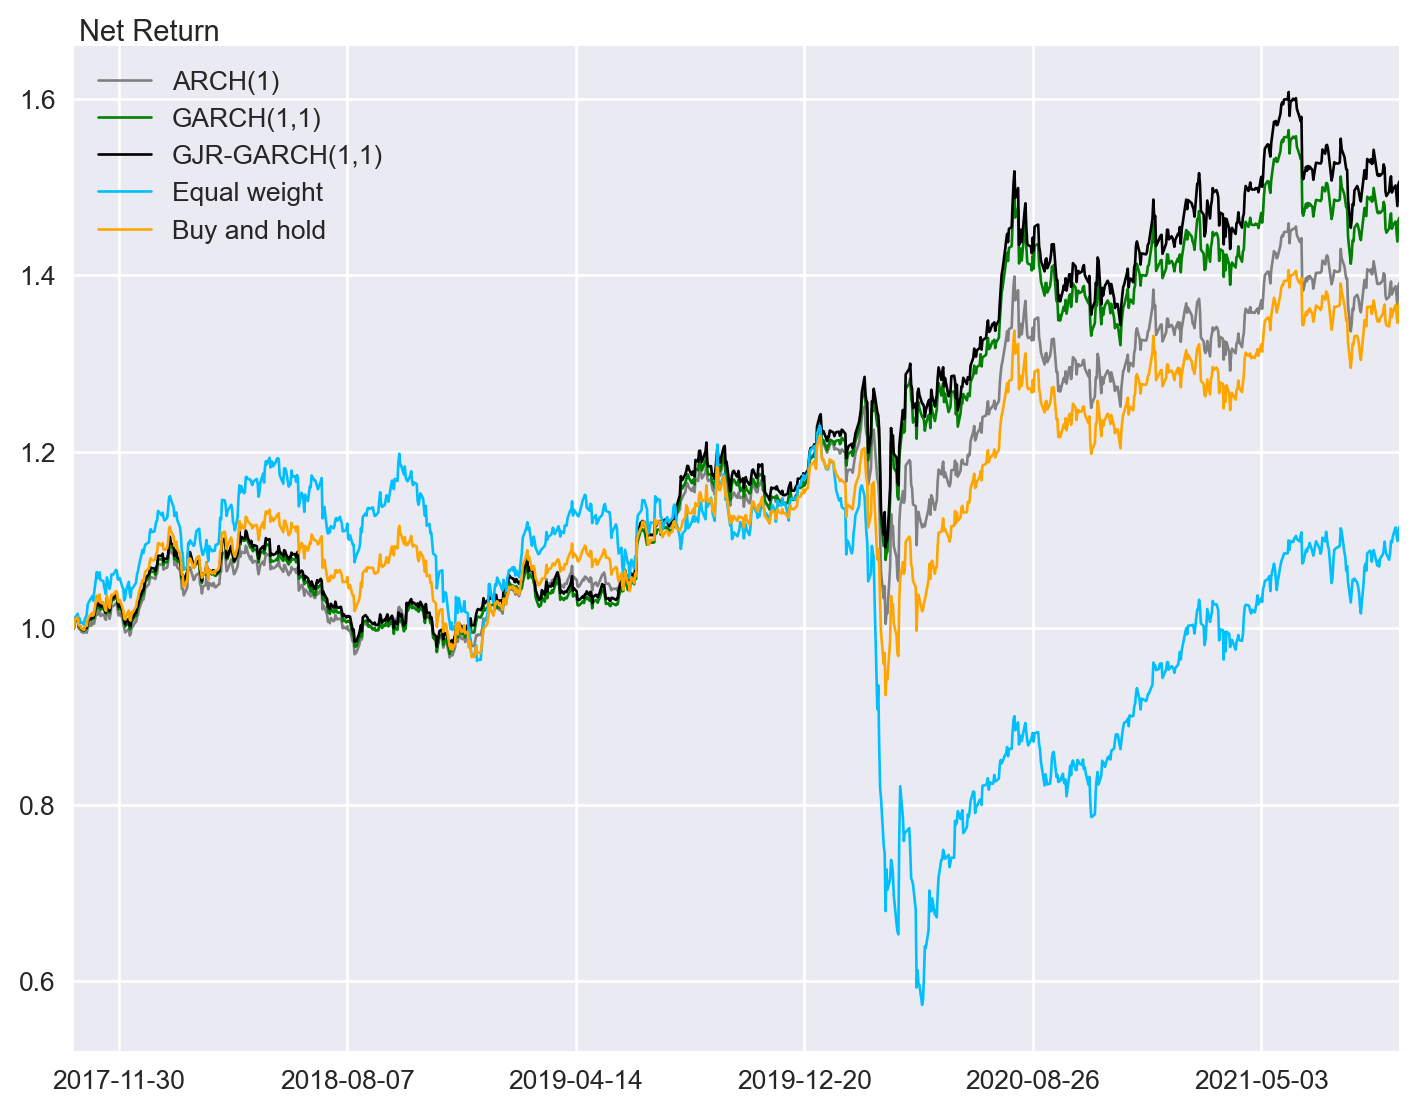

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_com_LSTD_TC,label=res_com_LSTD_TC.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_com_LSTD_TC.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Net Return',loc='top', rotation = 0, labelpad = -76) 
fig.savefig("Performance_TC_com_after_M.png", bbox_inches = 'tight', pad_inches = 0.1)

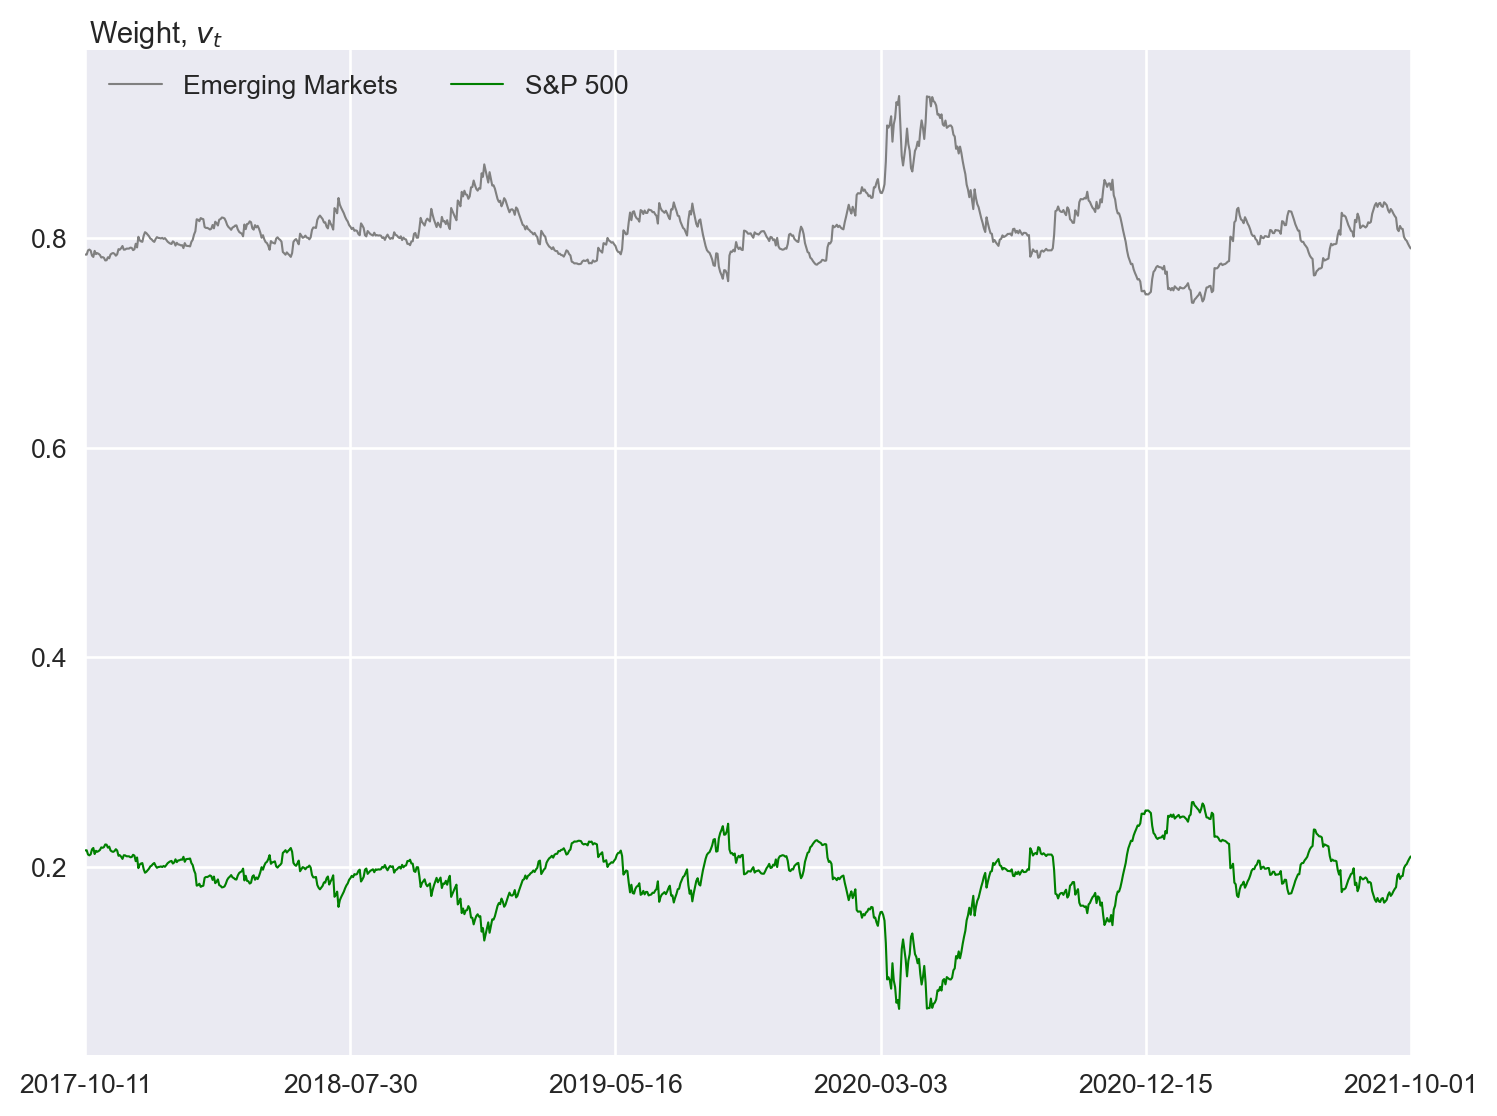

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH_com_LSTD,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("ARCH_weight_TC_com_M.png", bbox_inches = 'tight', pad_inches = 0.1)

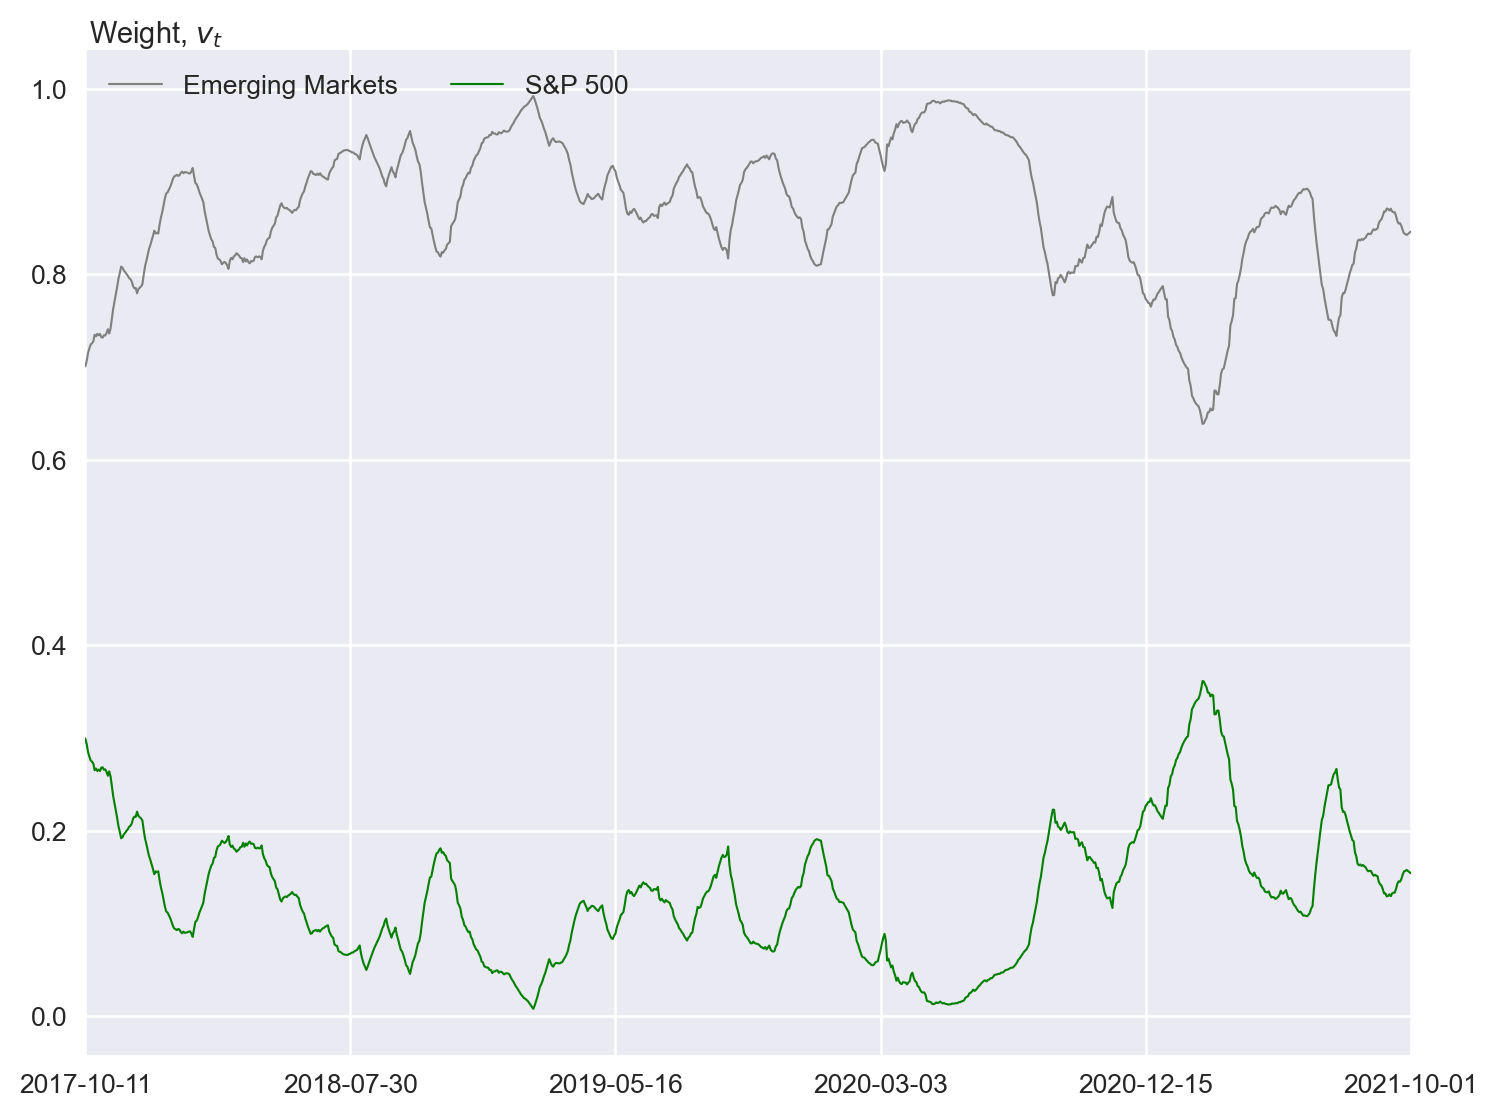

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH_com_LSTD,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("GARCH_weight_TC_com_M.png", bbox_inches = 'tight', pad_inches = 0.1)

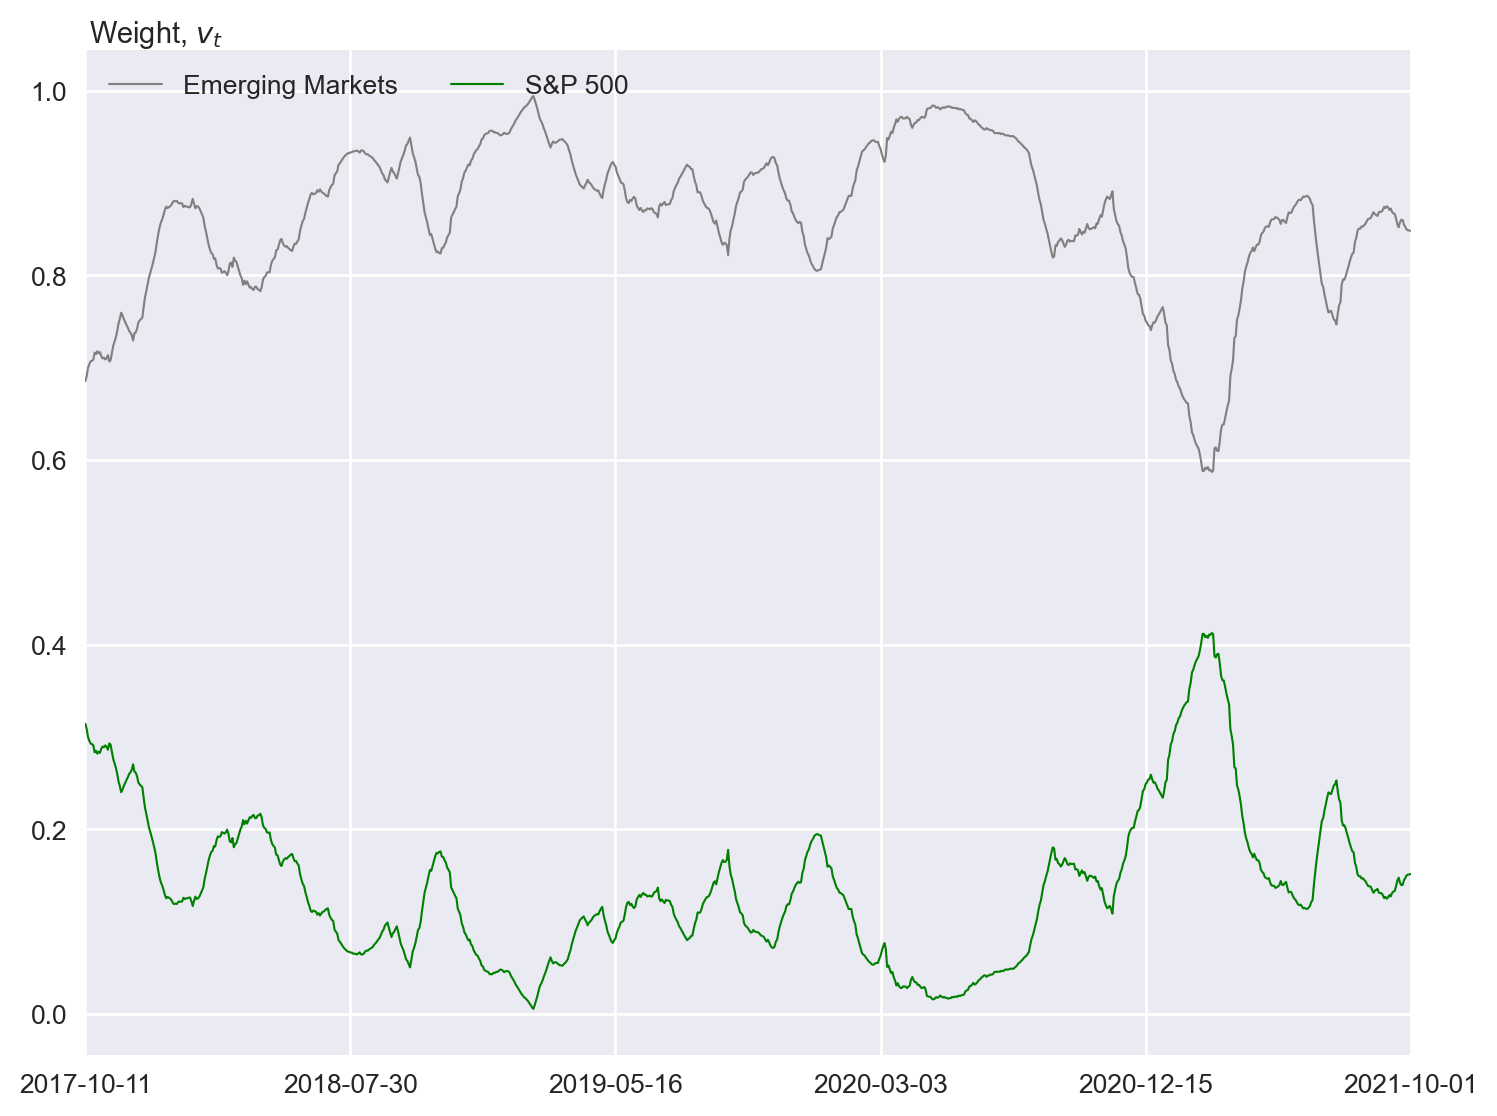

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR_com_LSTD,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("GJRGARCH_weight_TC_com_M.png", bbox_inches = 'tight', pad_inches = 0.1)

In [58]:
print(perf_table_com_LSTD.round(4).to_latex())  

\begin{tabular}{lrrr}
\toprule
{} &  Ann. standard deviation &  Ann. return &  Ann. Sharpe ratio \\
\midrule
ARCH(1)           &                   0.1460 &       0.1009 &             0.6909 \\
GARCH(1,1)        &                   0.1446 &       0.1053 &             0.7280 \\
GJR-GARCH(1,1)    &                   0.1448 &       0.1124 &             0.7763 \\
Buy and hold      &                   0.1584 &       0.0816 &             0.5151 \\
Equal weight      &                   0.2412 &       0.1141 &             0.4733 \\
ARCH(1) TC        &                   0.1457 &       0.0860 &             0.5905 \\
GARCH(1,1) TC     &                   0.1446 &       0.1002 &             0.6927 \\
GJR-GARCH(1,1) TC &                   0.1448 &       0.1078 &             0.7443 \\
Equal weight TC   &                   0.2446 &       0.0275 &             0.1125 \\
Buy and hold TC   &                   0.1584 &       0.0816 &             0.5151 \\
\bottomrule
\end{tabular}



**Commundities, high gamma**

In [59]:
v_t_ARCH_com_HSR,v_t_GARCH_com_HSR, v_t_GJR_com_HSR, perf_table_com_HSR,res_com_HSR,res_com_HSR_TC = backtesting(commodities,gamma_high)

['GC=F', 'BZ=F']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 0.0001
['GC=F', 'BZ=F']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 0.0001
['GC=F', 'BZ=F']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 0.0001


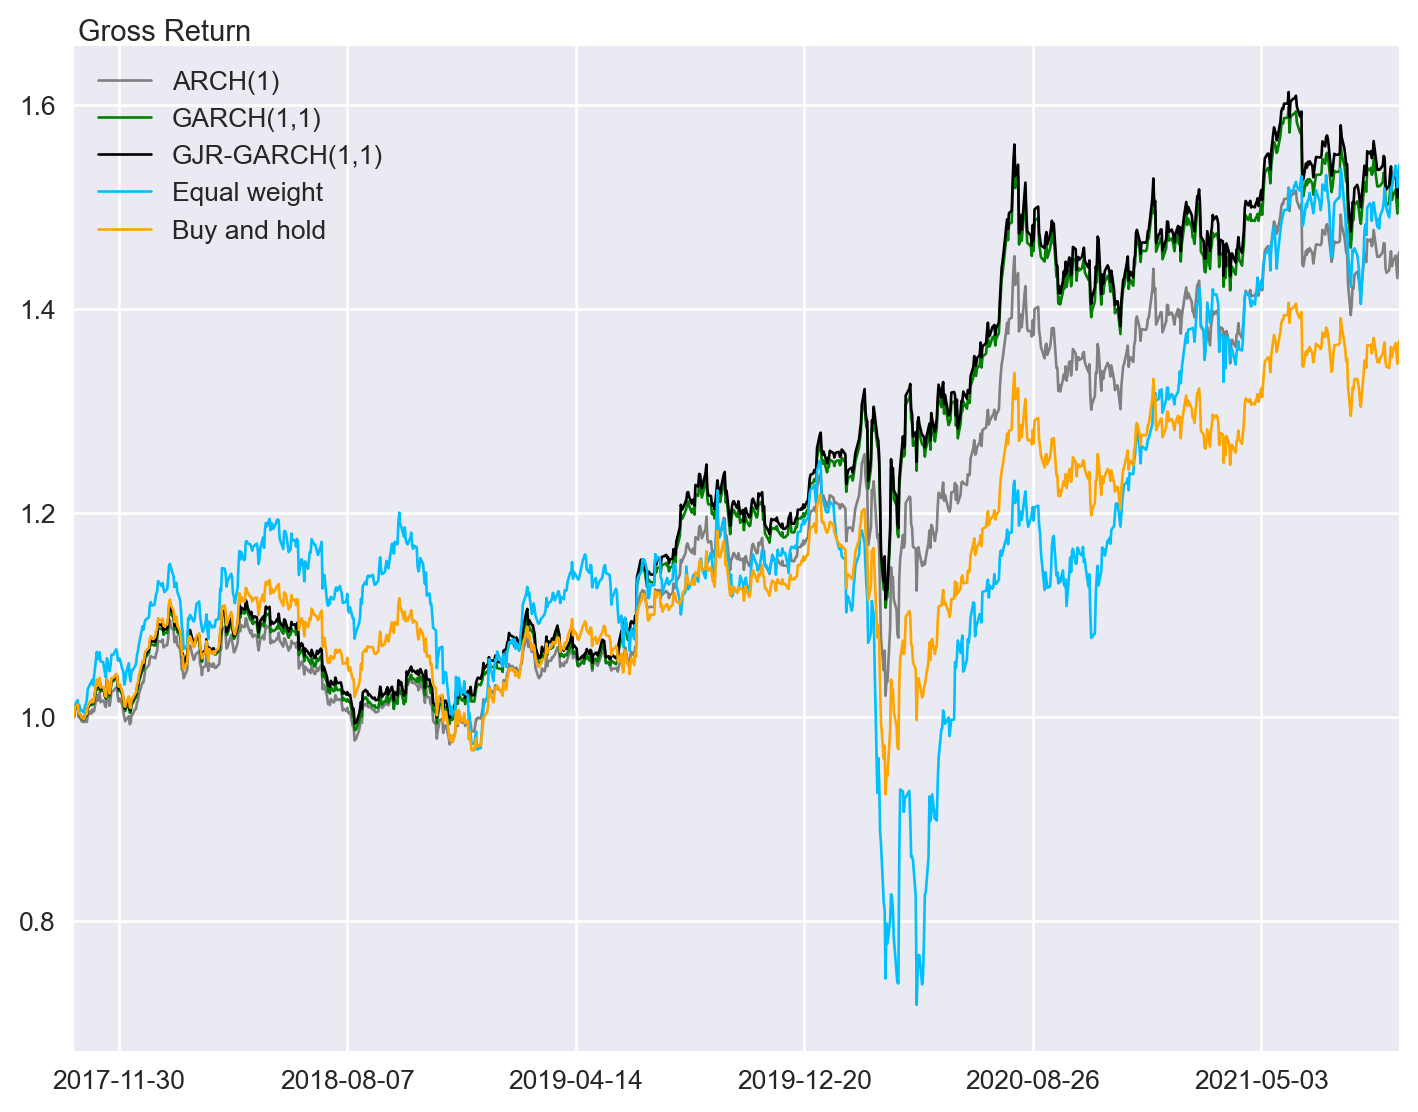

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_com_HSR,label=res_com_HSR.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_com_HSR.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
fig.savefig("Performance_TC_com_before_H.png", bbox_inches = 'tight', pad_inches = 0.1)

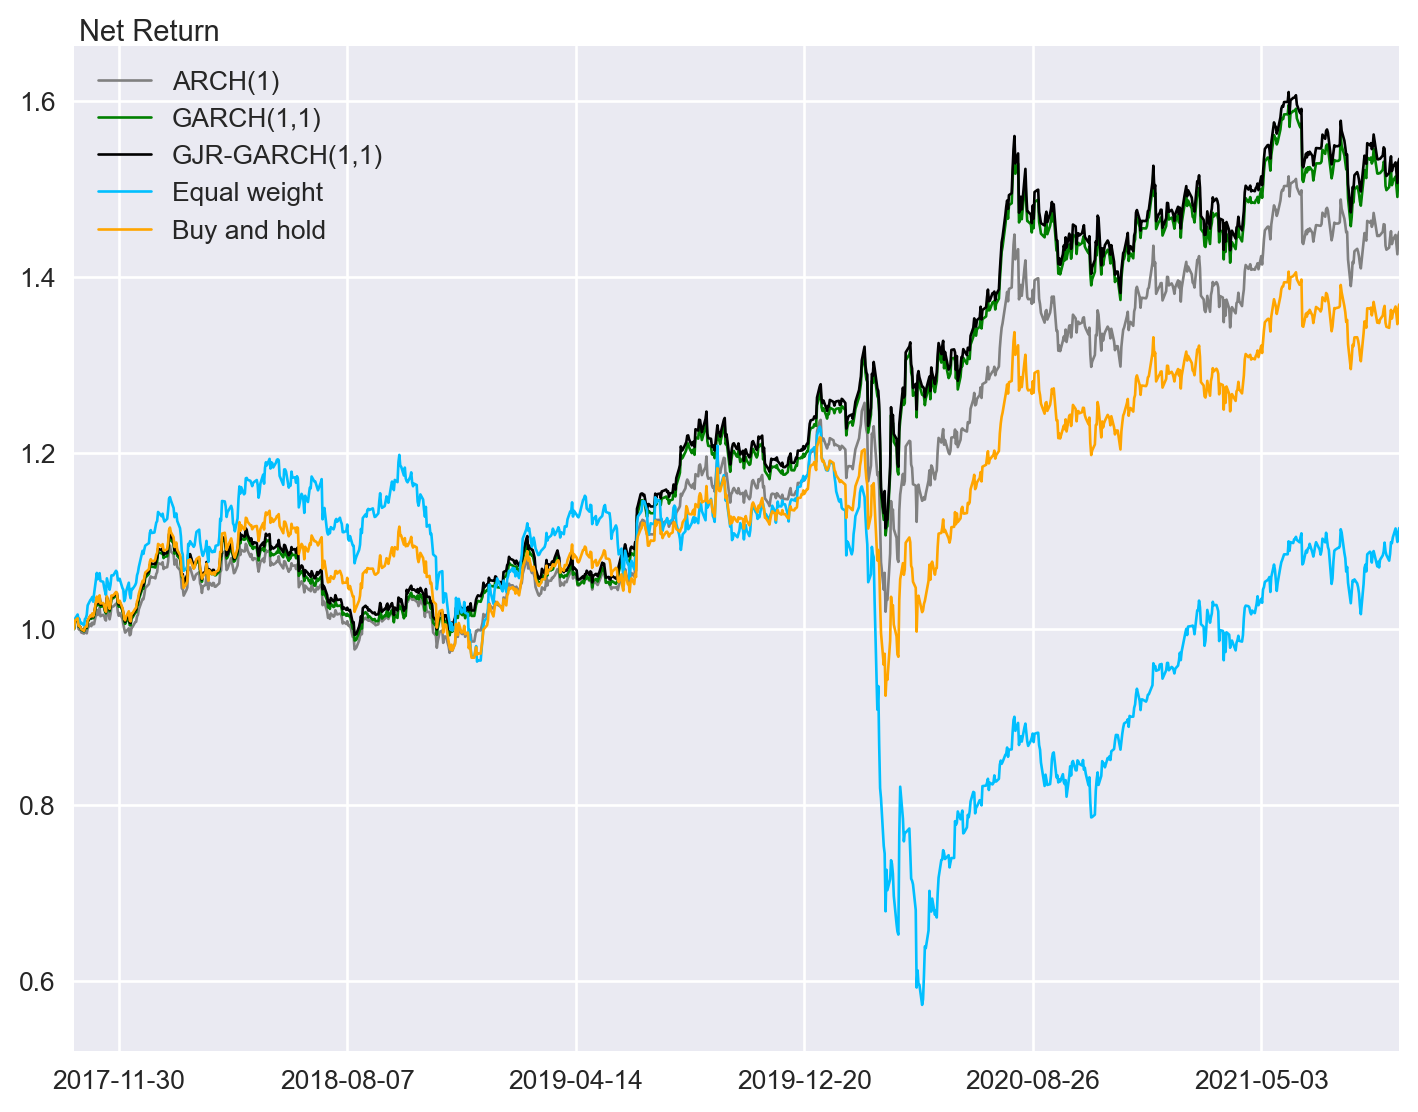

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_com_HSR_TC,label=res_com_HSR_TC.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_com_HSR_TC.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Net Return',loc='top', rotation = 0, labelpad = -76) 
fig.savefig("Performance_TC_com_after_H.png", bbox_inches = 'tight', pad_inches = 0.1)

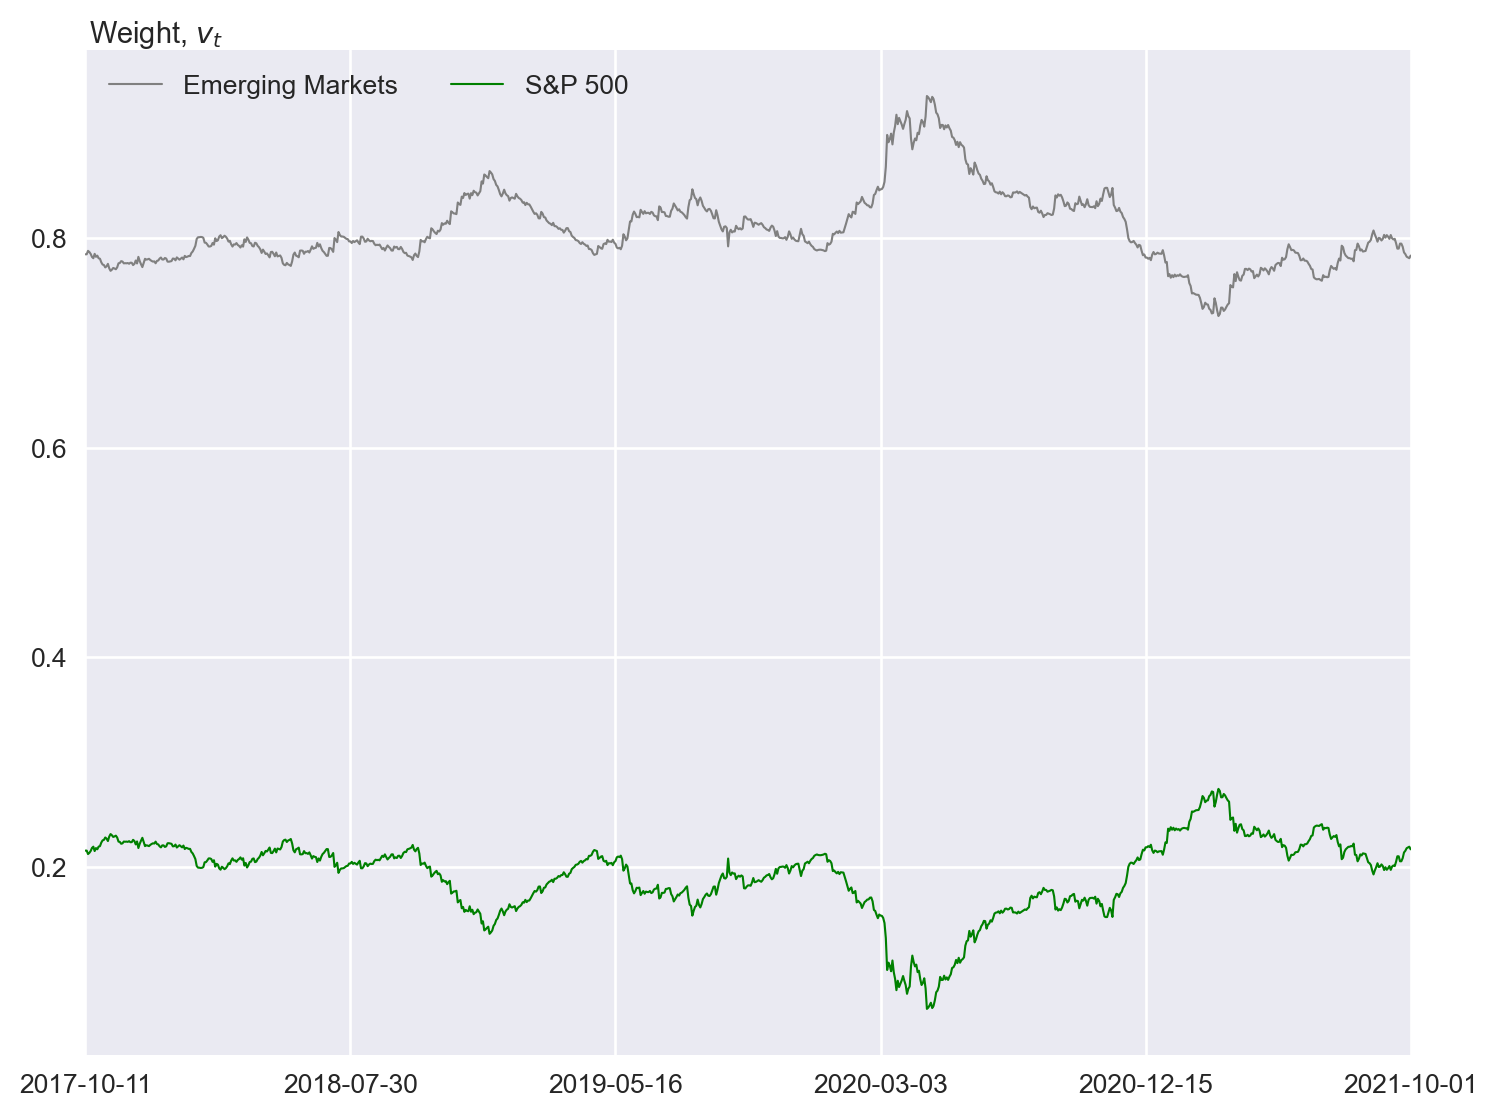

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH_com_HSR,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("ARCH_weight_TC_com_H.png", bbox_inches = 'tight', pad_inches = 0.1)

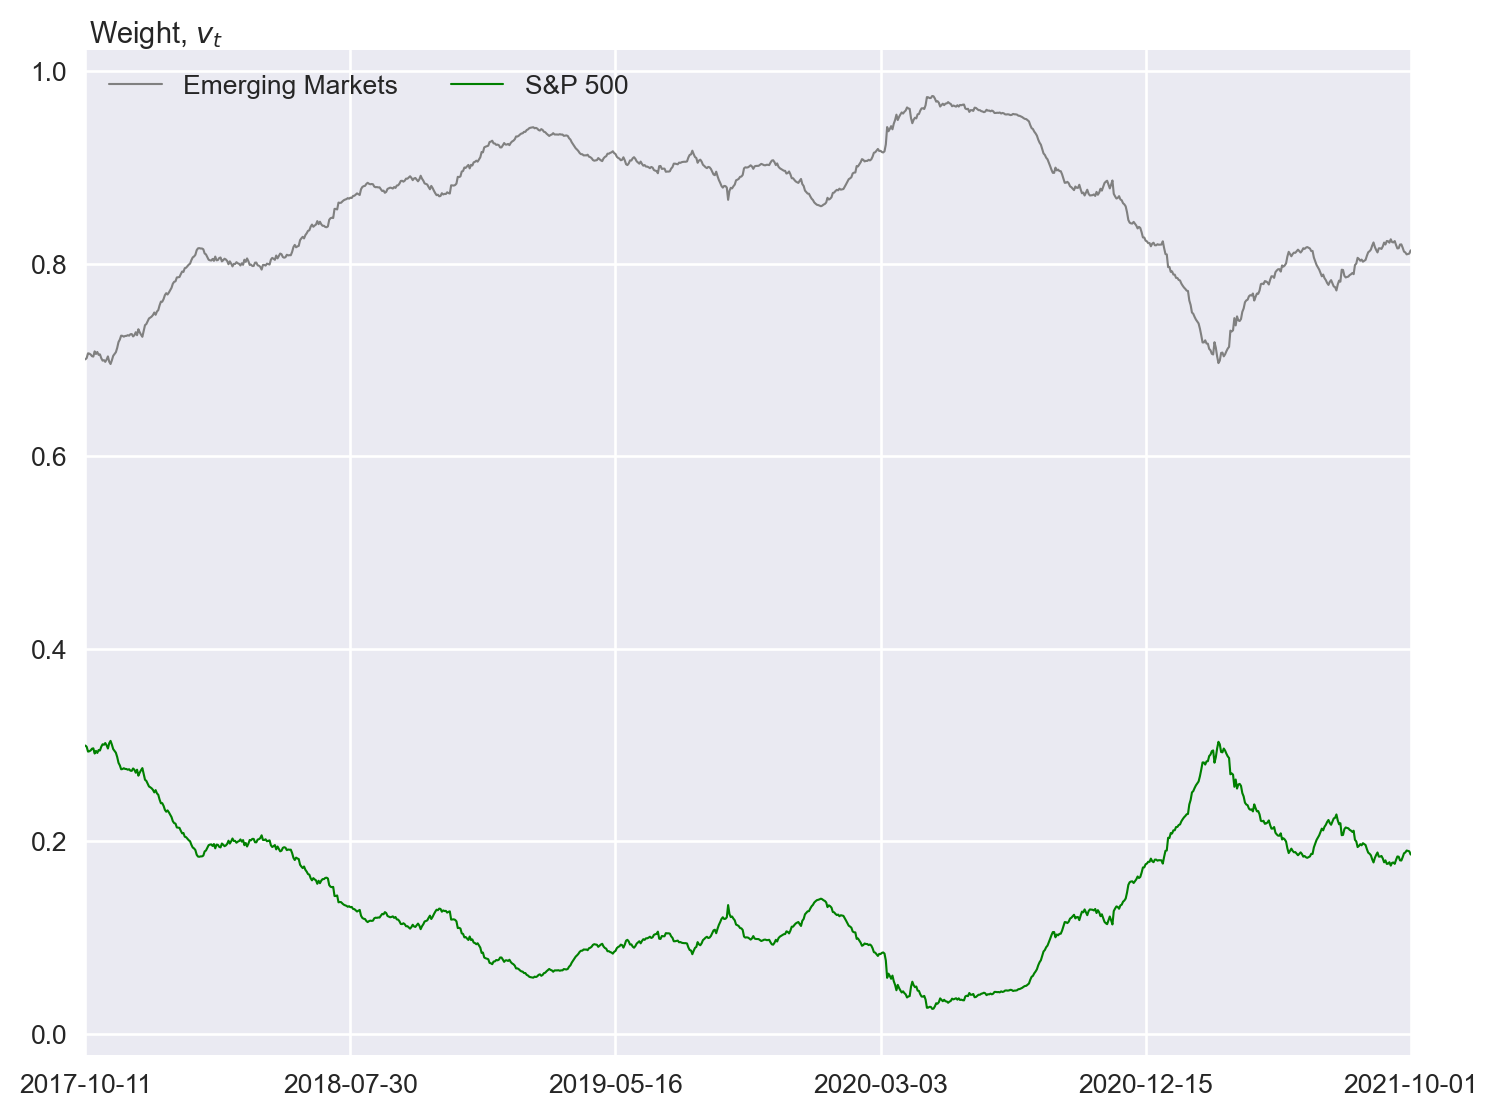

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH_com_HSR,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("GARCH_weight_TC_com_H.png", bbox_inches = 'tight', pad_inches = 0.1)

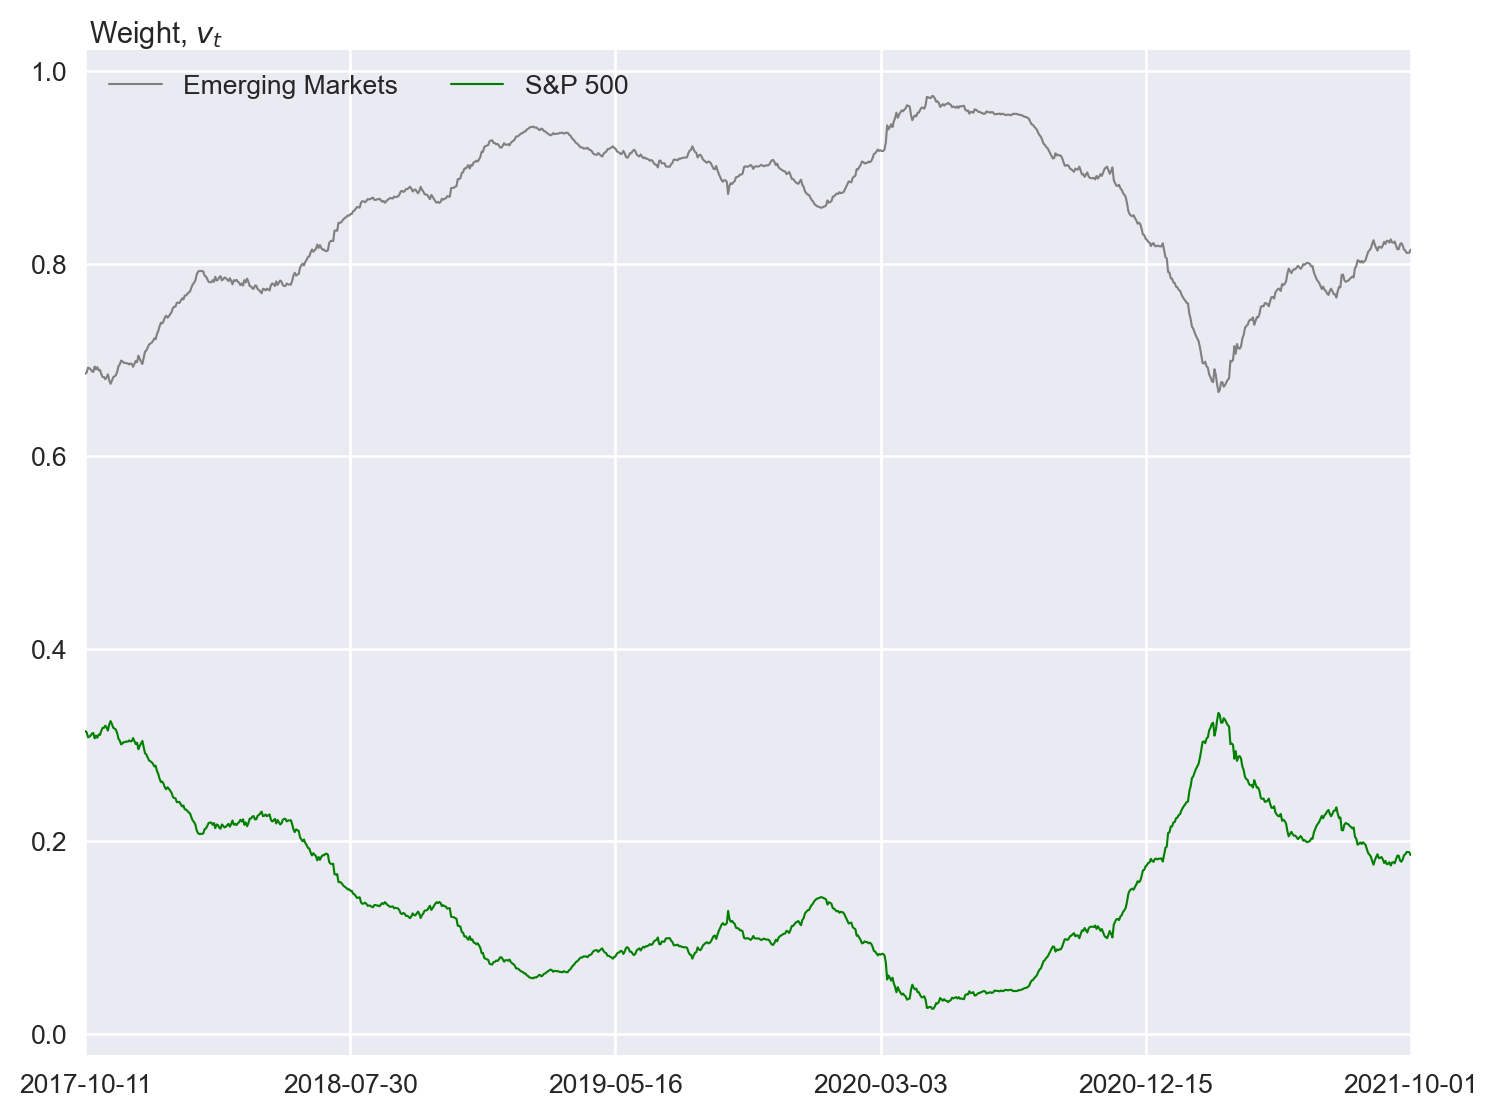

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR_com_HSR,linewidth=0.8)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -73) 
fig.savefig("GJRGARCH_weight_TC_com_H.png", bbox_inches = 'tight', pad_inches = 0.1)

In [65]:
print(perf_table_com_HSR.round(4).to_latex())  

\begin{tabular}{lrrr}
\toprule
{} &  Ann. standard deviation &  Ann. return &  Ann. Sharpe ratio \\
\midrule
ARCH(1)           &                   0.1451 &       0.0984 &             0.6783 \\
GARCH(1,1)        &                   0.1439 &       0.1104 &             0.7675 \\
GJR-GARCH(1,1)    &                   0.1444 &       0.1134 &             0.7849 \\
Buy and hold      &                   0.1584 &       0.0816 &             0.5151 \\
Equal weight      &                   0.2412 &       0.1141 &             0.4733 \\
ARCH(1) TC        &                   0.1450 &       0.0975 &             0.6724 \\
GARCH(1,1) TC     &                   0.1439 &       0.1099 &             0.7640 \\
GJR-GARCH(1,1) TC &                   0.1444 &       0.1129 &             0.7814 \\
Equal weight TC   &                   0.2446 &       0.0275 &             0.1125 \\
Buy and hold TC   &                   0.1584 &       0.0816 &             0.5151 \\
\bottomrule
\end{tabular}

